# Exploratory Data Analysis

In [2]:
#import lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

| Field Name              | Data Type       | Description                                                                                   |
|-------------------------|-----------------|-----------------------------------------------------------------------------------------------|
| accounting_date         | Date            | The date when the financial transaction is recorded in the accounting system.                |
| fiscal_year             | Integer         | The year in which the transaction occurs, based on the company's fiscal calendar.            |
| fiscal_month            | Integer         | The month of the fiscal year during which the transaction takes place.                       |
| calendar_year           | Integer         | The year in which the transaction occurs, based on the standard calendar.                    |
| calendar_month          | Integer         | The month of the year during which the transaction takes place, based on the standard calendar. |
| calendar_day            | Integer         | The specific day of the month on which the transaction occurs.                               |
| company_code            | String          | A unique identifier for the company conducting the transaction.                              |
| customer_code           | String          | A unique identifier for the customer involved in the transaction.                            |
| customer_district_code  | String          | A code representing the geographical district of the customer.                               |
| item_code               | String          | A unique identifier for the item being sold.                                                 |
| business_area_code      | String          | A code representing the specific area of business related to the transaction.                |
| item_group_code         | String          | A code indicating the group to which the item belongs.                                       |
| item_class_code         | String          | A code categorizing the item based on its characteristics or type.                           |
| item_type               | String          | A descriptor indicating the nature or category of the item.                                  |
| bonus_group_code        | String          | A code identifying the group related to bonuses or incentives for sales.                     |
| environment_group_code  | String          | A code denoting the environmental category related to the product.                           |
| technology_group_code   | String          | A code representing the technology category associated with the item or service.             |
| commission_group_code   | String          | A code identifying the group that determines commission structures for sales.                |
| reporting_classification| String          | A classification used for reporting purposes, indicating how the transaction should be categorized. |
| light_source            | String          | A code indicating the source of lighting related to the item, if applicable.                 |
| warehouse_code          | String          | A code identifying the warehouse where the item is stored or shipped from.                   |
| abc_class_code          | String          | A classification code used in inventory management to indicate the importance of an item (e.g., A, B, C categories). |
| abc_class_volume        | Float           | The volume of goods associated with the ABC classification.                                  |
| business_chain_l1_code  | String          | A code representing the first level of the business chain for tracking and analysis.          |
| business_chain_l1_name  | String          | The name corresponding to the business chain level 1 code.                                   |
| contact_method_code     | String          | A code indicating the contact used.                                                          |
| salesperson_code        | String          | A unique identifier for the salesperson associated with the transaction.                     |
| order_type_code         | String          | A code that categorizes the type of order.                                                   |
| market_segment          | String          | A descriptor of the specific market segment targeted by the transaction.                     |
| value_sales             | Float           | The monetary value of sales generated from the transaction.                                  |
| value_cost              | Float           | The cost associated with the transaction.                                                    |
| value_quantity          | Integer         | The quantity of items sold or transacted.                                                    |
| value_price_adjustment  | Float           | Any adjustments made to the price during the transaction (discounts, surcharges, etc.).      |
| currency                | String          | The currency in which the transaction is conducted.                                          |
| item_source_class       | String          | A classification indicating the source or origin of the item.                                |
| invoice_number          | String          | A unique identifier for the invoice related to the transaction.                              |
| line_number             | Integer         | The line item number on the invoice, indicating specific items.                              |
| invoice_date            | Date            | The date the invoice is issued.                                                              |
| customer_order_number   | String          | A unique identifier for the customer's order.                                                |
| order_date              | Date            | The date when the order was placed.                                                          |
| dss_update_time         | Timestamp       | The timestamp indicating when the data was last updated in the system.                       |



## 1. Understanding Data Structure:

- Examine data types, column names, and dataset size.
- Check how the data is organized—categorical vs. numerical features, distribution, and relationships.

In [3]:
df_2012 = pd.read_csv("../data/raw/2012_Data.csv", encoding='unicode_escape', low_memory=False)
df_2013 = pd.read_csv("../data/raw/2013_Data.csv", encoding='unicode_escape', low_memory=False)

In [4]:
#show data shape
print(f"2012 data \nrows: {df_2012.shape[0]:,} | columns: {df_2012.shape[1]}")
print(f"2013 data \nrows: {df_2013.shape[0]:,} | columns: {df_2013.shape[1]}")
#show first five rows
df_2012.head()


2012 data 
rows: 1,037,205 | columns: 41
2013 data 
rows: 951,177 | columns: 41


,accounting_date,fiscal_year,fiscal_month,calendar_year,calendar_month,calendar_day,company_code,customer_code,customer_district_code,item_code,...,value_quantity,value_price_adjustment,currency,item_source_class,invoice_number,line_number,invoice_date,customer_order_number,order_date,dss_update_time
0,20120509,2012,11,2012,5,9,101,411800601,410,GENIE8WWWBC,...,84.0,0,AUD,NaN,2217887,1,20120509,2865354,20120509,49:58.7
1,20120216,2012,8,2012,2,16,101,361000403,300,GENIE8WWWBC,...,12.0,0,AUD,NaN,2185745,1,20120216,2833515,20120216,49:58.7
2,20120509,2012,11,2012,5,9,101,361000403,300,GENIE8WWWBC,...,12.0,0,AUD,NaN,2217807,1,20120509,2864857,20120508,49:58.7
3,20120518,2012,11,2012,5,18,101,565540415,500,GENIE8WWWBC,...,6.0,0,AUD,NaN,2222758,1,20120518,2869759,20120518,49:58.7
4,20120109,2012,7,2012,1,9,101,565540415,500,GENIE8WWWBC,...,6.0,0,AUD,NaN,2170374,1,20120109,2819189,20120109,49:58.7


In [5]:
# count object variables
num_obj = df_2012.select_dtypes('object').shape
print(f"count object column = {num_obj[1]}")
#count numerical variables
num_numerical = df_2012.select_dtypes(exclude='object').shape
print(f"count numerical column = {num_numerical[1]}")


count object column = 22
count numerical column = 19


In [6]:
df_2012.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037205 entries, 0 to 1037204
Data columns (total 41 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   accounting_date           1037205 non-null  int64  
 1   fiscal_year               1037205 non-null  int64  
 2   fiscal_month              1037205 non-null  int64  
 3   calendar_year             1037205 non-null  int64  
 4   calendar_month            1037205 non-null  int64  
 5   calendar_day              1037205 non-null  int64  
 6   company_code              1037205 non-null  int64  
 7   customer_code             1037205 non-null  object 
 8   customer_district_code    1037205 non-null  int64  
 9   item_code                 1037205 non-null  object 
 10  business_area_code        1037205 non-null  object 
 11  item_group_code           1037205 non-null  object 
 12  item_class_code           1037205 non-null  object 
 13  item_type                 1

In [7]:
df_2013.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951177 entries, 0 to 951176
Data columns (total 41 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accounting_date           951177 non-null  int64  
 1   fiscal_year               951177 non-null  int64  
 2   fiscal_month              951177 non-null  int64  
 3   calendar_year             951177 non-null  int64  
 4   calendar_month            951177 non-null  int64  
 5   calendar_day              951177 non-null  int64  
 6   company_code              951177 non-null  int64  
 7   customer_code             951177 non-null  object 
 8   customer_district_code    951177 non-null  int64  
 9   item_code                 951177 non-null  object 
 10  business_area_code        951177 non-null  object 
 11  item_group_code           951177 non-null  object 
 12  item_class_code           951177 non-null  object 
 13  item_type                 951177 non-null  i

In [8]:
df_2012['customer_order_number'] = df_2012['customer_order_number'].astype(str)

In [9]:
#combine 2012 and 2013 data
df = pd.concat([df_2012, df_2013], axis=0)
print(f"2012 and 2013 data \nrows: {df.shape[0]:,} | columns: {df.shape[1]}")
df.head()

2012 and 2013 data 
rows: 1,988,382 | columns: 41


,accounting_date,fiscal_year,fiscal_month,calendar_year,calendar_month,calendar_day,company_code,customer_code,customer_district_code,item_code,...,value_quantity,value_price_adjustment,currency,item_source_class,invoice_number,line_number,invoice_date,customer_order_number,order_date,dss_update_time
0,20120509,2012,11,2012,5,9,101,411800601,410,GENIE8WWWBC,...,84.0,0,AUD,NaN,2217887,1,20120509,2865354,20120509,49:58.7
1,20120216,2012,8,2012,2,16,101,361000403,300,GENIE8WWWBC,...,12.0,0,AUD,NaN,2185745,1,20120216,2833515,20120216,49:58.7
2,20120509,2012,11,2012,5,9,101,361000403,300,GENIE8WWWBC,...,12.0,0,AUD,NaN,2217807,1,20120509,2864857,20120508,49:58.7
3,20120518,2012,11,2012,5,18,101,565540415,500,GENIE8WWWBC,...,6.0,0,AUD,NaN,2222758,1,20120518,2869759,20120518,49:58.7
4,20120109,2012,7,2012,1,9,101,565540415,500,GENIE8WWWBC,...,6.0,0,AUD,NaN,2170374,1,20120109,2819189,20120109,49:58.7


In [10]:
df.describe().round(2)

,accounting_date,fiscal_year,fiscal_month,calendar_year,calendar_month,calendar_day,company_code,customer_district_code,item_type,value_sales,value_cost,value_quantity,value_price_adjustment,item_source_class,invoice_number,line_number,invoice_date,order_date
count,1988382.00,1988382.00,1988382.00,1988382.00,1988382.00,1988382.00,1988382.00,1988382.00,1988382.00,1988382.00,1988382.00,1988382.00,1988382.00,0.0,1988382.00,1988382.00,1988382.00,1988382.00
mean,20125439.03,2012.97,6.52,2012.48,6.40,15.46,230.01,381.77,5.84,409.85,263.81,27.18,0.02,NaN,1260426.04,0.36,20125439.03,20125347.39
std,5011.22,0.71,3.62,0.50,3.25,8.68,184.31,152.75,1.89,2935.18,2050.51,329.47,0.15,NaN,1355150.11,1.72,5011.22,5107.65
min,20120102.00,2012.00,1.00,2012.00,1.00,1.00,100.00,100.00,1.00,-793541.98,-141469.52,-45000.00,0.00,NaN,0.00,-92.00,20120102.00,20090326.00
25%,20120619.00,2012.00,3.00,2012.00,4.00,8.00,205.00,300.00,5.00,23.00,9.38,2.00,0.00,NaN,656432.00,0.00,20120619.00,20120615.00
50%,20121206.00,2013.00,7.00,2012.00,6.00,15.00,205.00,400.00,7.00,67.50,31.07,6.00,0.00,NaN,749627.00,0.00,20121206.00,20121204.00
75%,20130620.00,2013.00,10.00,2013.00,9.00,23.00,205.00,500.00,7.00,197.70,101.91,20.00,0.00,NaN,2214221.75,1.00,20130620.00,20130618.00
max,20131231.00,2014.00,12.00,2013.00,12.00,31.00,950.00,720.00,9.00,793541.98,777669.20,105000.00,1.00,NaN,7003023.00,49.00,20131231.00,20131230.00


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1988382 entries, 0 to 951176
Data columns (total 41 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   accounting_date           int64  
 1   fiscal_year               int64  
 2   fiscal_month              int64  
 3   calendar_year             int64  
 4   calendar_month            int64  
 5   calendar_day              int64  
 6   company_code              int64  
 7   customer_code             object 
 8   customer_district_code    int64  
 9   item_code                 object 
 10  business_area_code        object 
 11  item_group_code           object 
 12  item_class_code           object 
 13  item_type                 int64  
 14  bonus_group_code          object 
 15  environment_group_code    object 
 16  technology_group_code     object 
 17  commission_group_code     object 
 18  reporting_classification  object 
 19  light_source              object 
 20  warehouse_code            obje

In [12]:
# fix data type of 'Date' column
df['accounting_date'] = pd.to_datetime(df['accounting_date'], format='%Y%m%d')

df['invoice_date'] = pd.to_datetime(df['invoice_date'], format='%Y%m%d')

df['order_date'] = pd.to_datetime(df['order_date'], format='%Y%m%d')

df['fiscal_date'] = pd.to_datetime(df['fiscal_year'].astype(str) + '-' + df['fiscal_month'].astype(str) + '-01', format='%Y-%m-%d')

df['calendar_date'] = pd.to_datetime(df['calendar_year'].astype(str) + '-' + df['calendar_month'].astype(str) + '-' + df['calendar_day'].astype(str), format='%Y-%m-%d')

#drop month and year columns
df.drop(['fiscal_year', 'fiscal_month', 'calendar_year', 'calendar_month', 'calendar_day'], axis=1, inplace=True)


Fix date column data type by convert it to datetime datatyoe

In [13]:
df[['accounting_date', 'invoice_date', 'order_date', 'fiscal_date', 'calendar_date']].head()

,accounting_date,invoice_date,order_date,fiscal_date,calendar_date
0,2012-05-09,2012-05-09,2012-05-09,2012-11-01,2012-05-09
1,2012-02-16,2012-02-16,2012-02-16,2012-08-01,2012-02-16
2,2012-05-09,2012-05-09,2012-05-08,2012-11-01,2012-05-09
3,2012-05-18,2012-05-18,2012-05-18,2012-11-01,2012-05-18
4,2012-01-09,2012-01-09,2012-01-09,2012-07-01,2012-01-09


preview tre dataset date

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1988382 entries, 0 to 951176
Data columns (total 38 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   accounting_date           datetime64[ns]
 1   company_code              int64         
 2   customer_code             object        
 3   customer_district_code    int64         
 4   item_code                 object        
 5   business_area_code        object        
 6   item_group_code           object        
 7   item_class_code           object        
 8   item_type                 int64         
 9   bonus_group_code          object        
 10  environment_group_code    object        
 11  technology_group_code     object        
 12  commission_group_code     object        
 13  reporting_classification  object        
 14  light_source              object        
 15  warehouse_code            object        
 16  abc_class_code            object        
 17  abc_class_volu

In [15]:
#fix data type for numerical columns to object
df['company_code'] = df['company_code'].astype(str)

df['customer_district_code'] = df['customer_district_code'].astype(str)


df['invoice_number'] = df['invoice_number'].astype(str)

df['item_type'] = df['item_type'].astype(str)


some column are number but it is category, so I convert it to string data type

In [16]:
df.select_dtypes('object').head()

,company_code,customer_code,customer_district_code,item_code,business_area_code,item_group_code,item_class_code,item_type,bonus_group_code,environment_group_code,...,business_chain_l1_code,business_chain_l1_name,contact_method_code,salesperson_code,order_type_code,market_segment,currency,invoice_number,customer_order_number,dss_update_time
0,101,411800601,410,GENIE8WWWBC,LMP,LMP01008,LMP01,5,Trade,S,...,ELC,ElectraCorp Ltd,NA,T612,NOR,Commercial & Industrial,AUD,2217887,2865354,49:58.7
1,101,361000403,300,GENIE8WWWBC,LMP,LMP01008,LMP01,5,Trade,S,...,BPS,BrightPower Solutions,NA,P345,NOR,Commercial & Industrial,AUD,2185745,2833515,49:58.7
2,101,361000403,300,GENIE8WWWBC,LMP,LMP01008,LMP01,5,Trade,S,...,BPS,BrightPower Solutions,NA,P345,NOR,Commercial & Industrial,AUD,2217807,2864857,49:58.7
3,101,565540415,500,GENIE8WWWBC,LMP,LMP01008,LMP01,5,Trade,S,...,GEW,Global Electric Wholesalers,NA,T504,EDI,Commercial & Industrial,AUD,2222758,2869759,49:58.7
4,101,565540415,500,GENIE8WWWBC,LMP,LMP01008,LMP01,5,Trade,S,...,GEW,Global Electric Wholesalers,NA,T504,EDI,Commercial & Industrial,AUD,2170374,2819189,49:58.7


In [17]:
#show numerical columns
df.select_dtypes(exclude=['object', 'datetime']).head()

,value_sales,value_cost,value_quantity,value_price_adjustment,item_source_class,line_number
0,218.40,178.1976,84.0,0,NaN,1
1,38.28,25.4568,12.0,0,NaN,1
2,40.20,25.4568,12.0,0,NaN,1
3,20.10,12.7284,6.0,0,NaN,1
4,19.14,12.7284,6.0,0,NaN,1


In [18]:
#show count of each data type
print(df.shape)
df.dtypes.value_counts()

(1988382, 38)


object            27
datetime64[ns]     5
float64            4
int64              2
Name: count, dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1988382 entries, 0 to 951176
Data columns (total 38 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   accounting_date           datetime64[ns]
 1   company_code              object        
 2   customer_code             object        
 3   customer_district_code    object        
 4   item_code                 object        
 5   business_area_code        object        
 6   item_group_code           object        
 7   item_class_code           object        
 8   item_type                 object        
 9   bonus_group_code          object        
 10  environment_group_code    object        
 11  technology_group_code     object        
 12  commission_group_code     object        
 13  reporting_classification  object        
 14  light_source              object        
 15  warehouse_code            object        
 16  abc_class_code            object        
 17  abc_class_volu

In [20]:
df.describe().round(2)

,accounting_date,value_sales,value_cost,value_quantity,value_price_adjustment,item_source_class,line_number,invoice_date,order_date,fiscal_date,calendar_date
count,1988382,1988382.00,1988382.00,1988382.00,1988382.00,0.0,1988382.00,1988382,1988382,1988382,1988382
mean,2012-12-19 08:25:48.122643712,409.85,263.81,27.18,0.02,NaN,0.36,2012-12-19 08:25:48.122643712,2012-12-15 16:19:19.266981120,2013-06-05 14:16:01.015337984,2012-12-19 08:25:48.122643712
min,2012-01-02 00:00:00,-793541.98,-141469.52,-45000.00,0.00,NaN,-92.00,2012-01-02 00:00:00,2009-03-26 00:00:00,2012-07-01 00:00:00,2012-01-02 00:00:00
25%,2012-06-19 00:00:00,23.00,9.38,2.00,0.00,NaN,0.00,2012-06-19 00:00:00,2012-06-15 00:00:00,2012-12-01 00:00:00,2012-06-19 00:00:00
50%,2012-12-06 00:00:00,67.50,31.07,6.00,0.00,NaN,0.00,2012-12-06 00:00:00,2012-12-04 00:00:00,2013-06-01 00:00:00,2012-12-06 00:00:00
75%,2013-06-20 00:00:00,197.70,101.91,20.00,0.00,NaN,1.00,2013-06-20 00:00:00,2013-06-18 00:00:00,2013-12-01 00:00:00,2013-06-20 00:00:00
max,2013-12-31 00:00:00,793541.98,777669.20,105000.00,1.00,NaN,49.00,2013-12-31 00:00:00,2013-12-30 00:00:00,2014-06-01 00:00:00,2013-12-31 00:00:00
std,NaN,2935.18,2050.51,329.47,0.15,NaN,1.72,NaN,NaN,NaN,NaN


In [21]:
# Loop through each column and print the unique values
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values for column '{column}':")
    print(unique_values)
    print("\n")

Unique values for column 'accounting_date':
<DatetimeArray>
['2012-05-09 00:00:00', '2012-02-16 00:00:00', '2012-05-18 00:00:00',
 '2012-01-09 00:00:00', '2012-05-04 00:00:00', '2012-06-26 00:00:00',
 '2012-06-05 00:00:00', '2012-06-22 00:00:00', '2012-04-03 00:00:00',
 '2012-04-18 00:00:00',
 ...
 '2013-12-31 00:00:00', '2013-12-24 00:00:00', '2013-12-27 00:00:00',
 '2013-12-23 00:00:00', '2013-12-30 00:00:00', '2013-12-22 00:00:00',
 '2013-11-23 00:00:00', '2013-11-16 00:00:00', '2013-07-27 00:00:00',
 '2013-08-31 00:00:00']
Length: 543, dtype: datetime64[ns]


Unique values for column 'company_code':
['101' '100' '140' '205' '170' '220' '950' '240' '510' '120']


Unique values for column 'customer_code':
['411800601' '361000403' '565540415' ... 'ZI2000017 ' 'Z85020601 '
 '434790100']


Unique values for column 'customer_district_code':
['410' '300' '500' '310' '400' '200' '210' '720' '710' '600' '510' '530'
 '535' '540' '520' '545' '100']


Unique values for column 'item_code':
['GE

## 2. Handling Missing Values:

- Determine the presence and extent of missing values.
- Visualize or summarize missing data to understand patterns.
- Decide on strategies to handle missing data (e.g., imputation, removal).

Data shape: (1988382, 38)
Percentage of df missing from each column


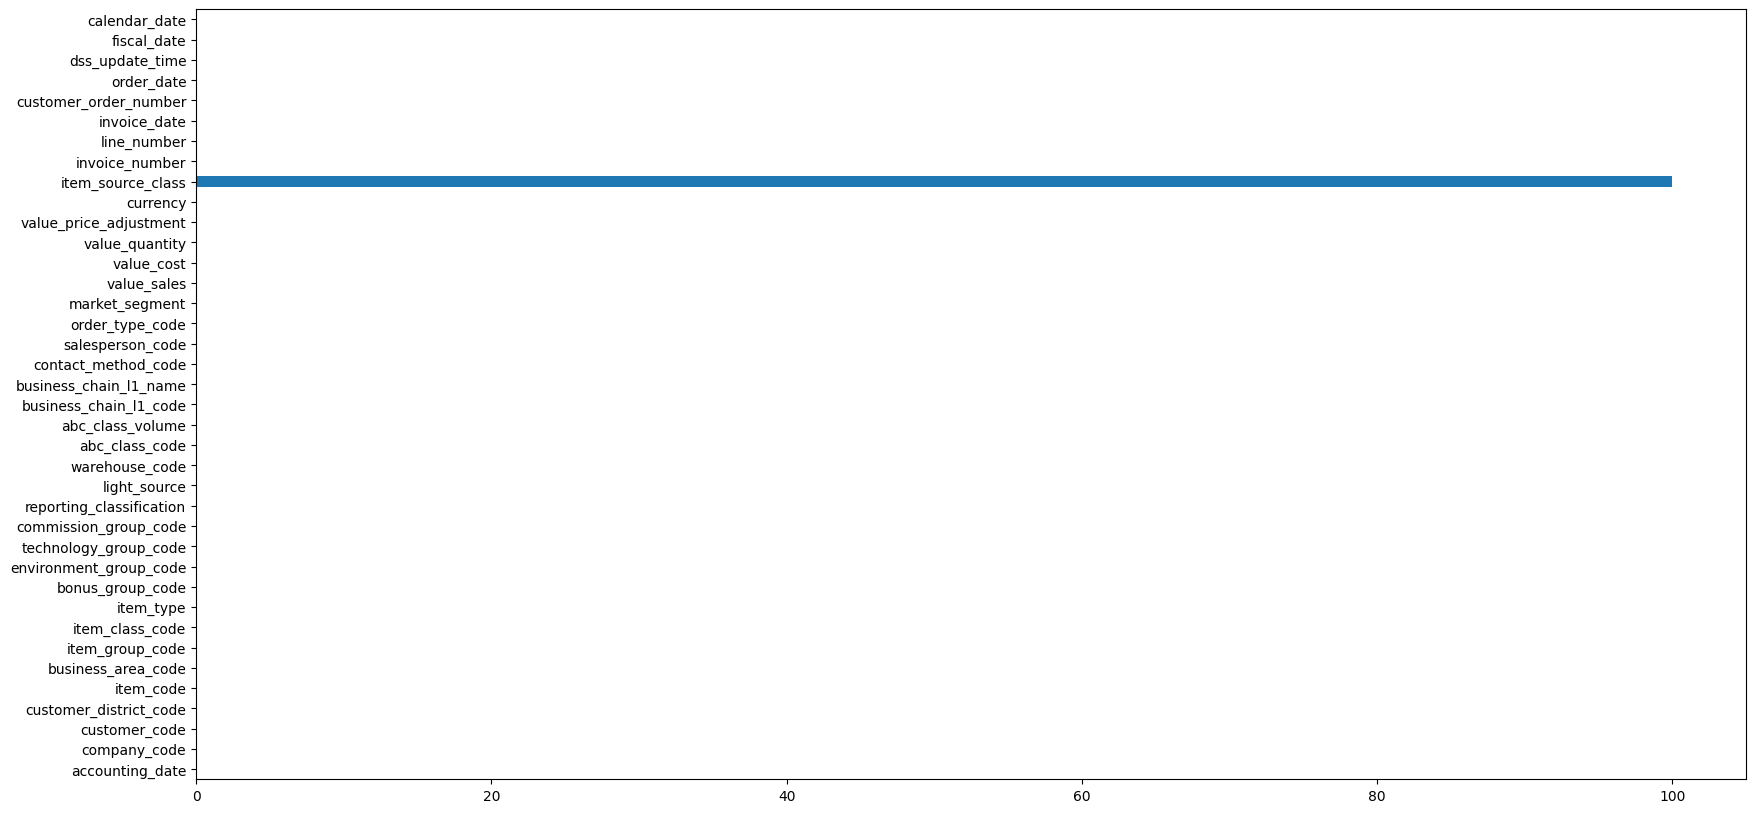

In [22]:
#show missing values
print("Data shape:", df.shape)
print("Percentage of df missing from each column")
missing_percentage = df.isnull().sum()/len(df)*100
missing_percentage.plot(kind='barh', figsize=(20,10))
plt.show()

In [23]:
for column in df.select_dtypes('object').columns:
    df[column] = df[column].str.strip()

In [ ]:
df['item_source_class'].value_counts(dropna=False)

item_source_class
NaN    1988382
Name: count, dtype: int64

In [25]:
#drop columns with high missing values
df.drop(['item_source_class'], axis=1, inplace=True)

In [26]:
df.isnull().sum()/len(df)*100

accounting_date             0.0
company_code                0.0
customer_code               0.0
customer_district_code      0.0
item_code                   0.0
business_area_code          0.0
item_group_code             0.0
item_class_code             0.0
item_type                   0.0
bonus_group_code            0.0
environment_group_code      0.0
technology_group_code       0.0
commission_group_code       0.0
reporting_classification    0.0
light_source                0.0
warehouse_code              0.0
abc_class_code              0.0
abc_class_volume            0.0
business_chain_l1_code      0.0
business_chain_l1_name      0.0
contact_method_code         0.0
salesperson_code            0.0
order_type_code             0.0
market_segment              0.0
value_sales                 0.0
value_cost                  0.0
value_quantity              0.0
value_price_adjustment      0.0
currency                    0.0
invoice_number              0.0
line_number                 0.0
invoice_

## 3. Identifying Outliers:

- Outliers can be identified through visualizations (e.g., boxplots) or statistical methods.
- Outliers may be errors or valuable indicators, and understanding them is critical for further analysis.

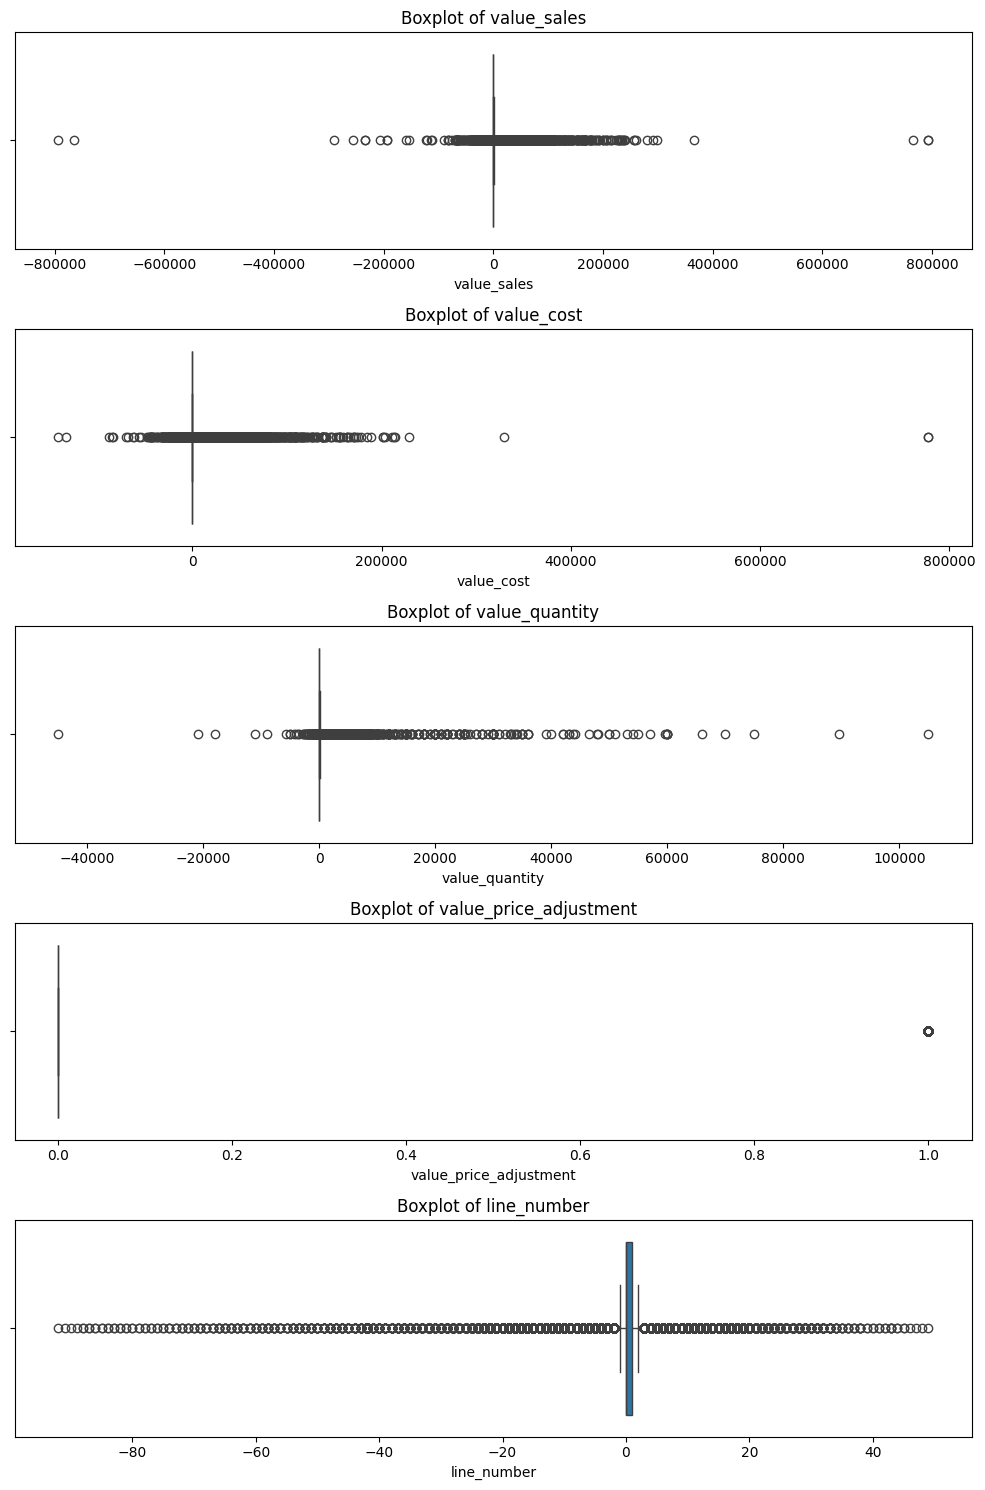

In [27]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=len(df.select_dtypes(exclude=['object', 'datetime']).columns), ncols=1, figsize=(10, 3 * len(df.select_dtypes(exclude=['object', 'datetime']).columns)))

# Loop through each numerical column and create a boxplot
for ax, col in zip(axes, df.select_dtypes(exclude=['object', 'datetime']).columns):
    sns.boxplot(data=df, x=col, ax=ax)
    ax.set_title(f'Boxplot of {col}')

# Adjust layout
plt.tight_layout()
plt.show()

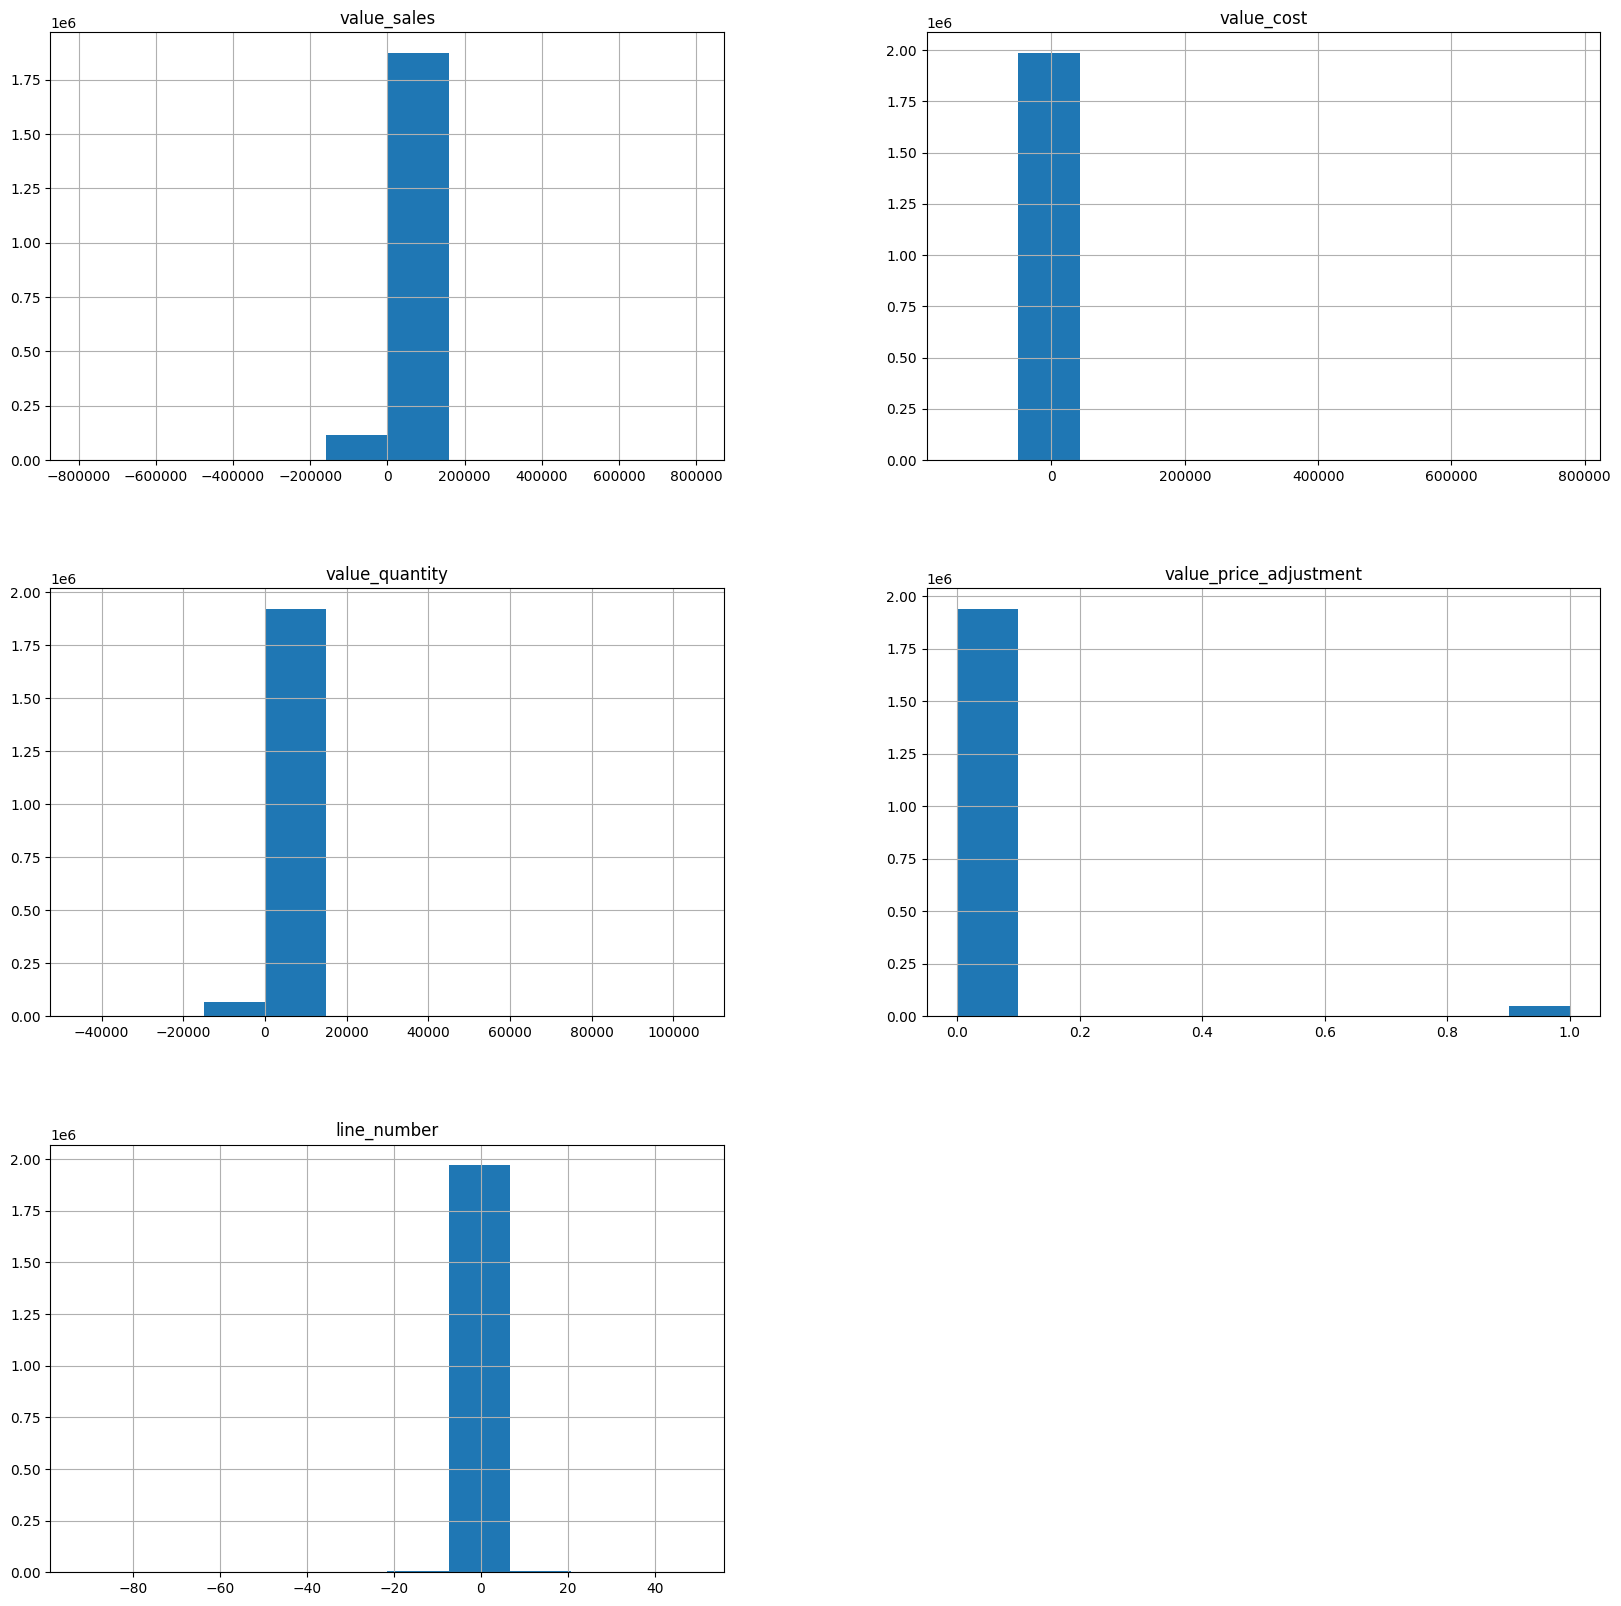

In [28]:
df.hist(figsize=(20, 20), column=df.select_dtypes(exclude=['object', 'datetime']).columns)
plt.show()

In [ ]:
#show negative value_sales
negative_sales = df[df['value_sales'] < 0]
print(f"count of negative value_sales: {negative_sales.shape[0]}")
negative_sales[['accounting_date', 'value_sales', 'value_cost', 'value_quantity', 'value_price_adjustment']].head()

count of negative value_sales: 113537


,accounting_date,value_sales,value_cost,value_quantity,value_price_adjustment
61,2012-02-02,-6.38,-4.2428,-2.0,0
115,2012-01-17,-95.70,-63.6420,-30.0,0
176,2012-04-17,-3.28,-1.9300,-1.0,0
182,2012-02-02,-77.56,-59.3992,-28.0,0
220,2012-01-20,-2.90,-1.9300,-1.0,0


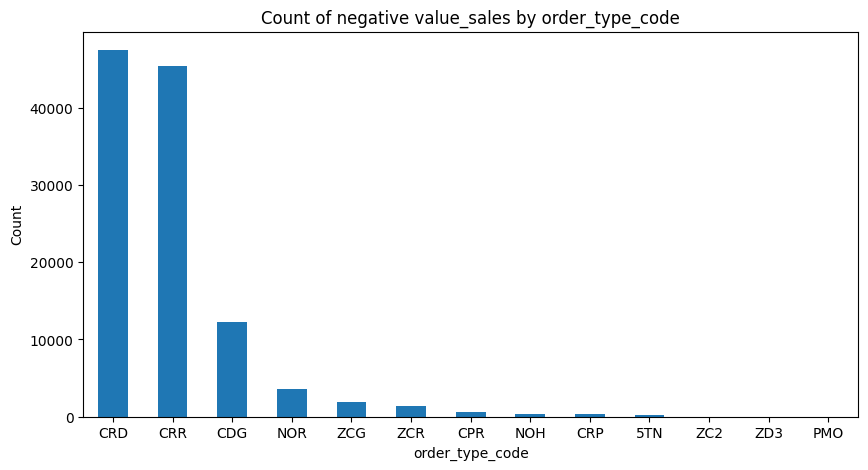

In [30]:
df[df['value_sales'] < 0]['order_type_code'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.title("Count of negative value_sales by order_type_code")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

From this bar chart it show that most negative sales has order_type_code CRD, CRR, CDG, and NOR. The reason why it has negative sales is because some order involve refunds, defect, price adjustment, and cancel order.

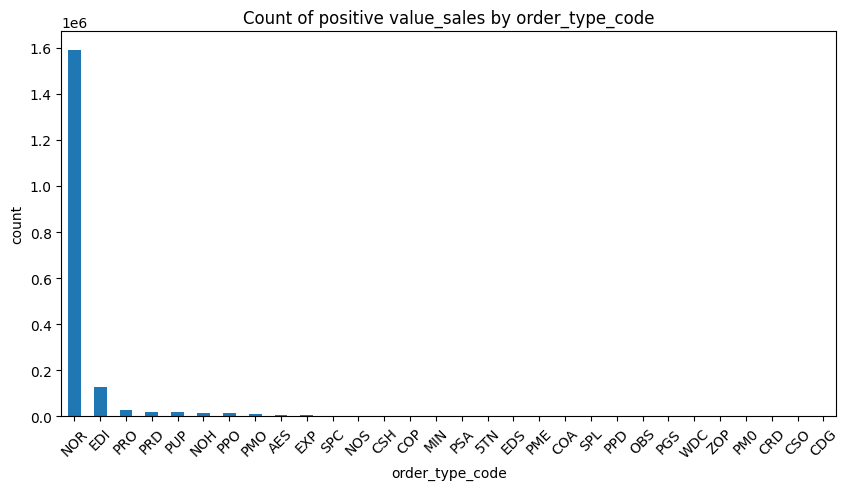

In [31]:
df[df['value_sales'] > 0]['order_type_code'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.title("Count of positive value_sales by order_type_code")
plt.ylabel('count')
plt.xticks(rotation=45)
plt.show()

Most possitve order are NOR, and EDI, which are normal order, and edi. EDI is Electronic Data Interchange, it is the computer-to-computer exchange of business documents in a standard electronic format between business partners.

In [ ]:
#inpect value_price_adjustment greater than 0
price_adjustment0 = df[df['value_price_adjustment'] > 0][['item_code', 'value_sales', 'value_cost', 'value_quantity', 'value_price_adjustment', 'order_type_code']]
print(f"count of value_price_adjustment greater than 0: {price_adjustment0.shape[0]}")
price_adjustment0.head()

count of value_price_adjustment greater than 0: 48551


,item_code,value_sales,value_cost,value_quantity,value_price_adjustment,order_type_code
630,GENIE18WCDLES,-79.75,0.0,0.0,1,CRD
1000,GENIE14WCDLBC,-70.56,0.0,0.0,1,CRD
1001,GENIE14WCDLBC,-1008.42,0.0,0.0,1,CRD
2376,GIGA2000MH,-68.08,0.0,0.0,1,CRD
2730,GENIE18WWWBC,-3.48,0.0,0.0,1,CRD


In [ ]:
price_adjustment0.describe(include='all').round(2)

,item_code,value_sales,value_cost,value_quantity,value_price_adjustment,order_type_code
count,48551,48551.00,48551.0,48551.0,48551.0,48551
unique,5615,NaN,NaN,NaN,NaN,6
top,16868,NaN,NaN,NaN,NaN,CRD
freq,559,NaN,NaN,NaN,NaN,45549
mean,NaN,-171.28,0.0,0.0,1.0,NaN
std,NaN,4725.38,0.0,0.0,0.0,NaN
min,NaN,-793541.98,0.0,0.0,1.0,NaN
25%,NaN,-54.00,0.0,0.0,1.0,NaN
50%,NaN,-20.60,0.0,0.0,1.0,NaN
75%,NaN,-6.12,0.0,0.0,1.0,NaN


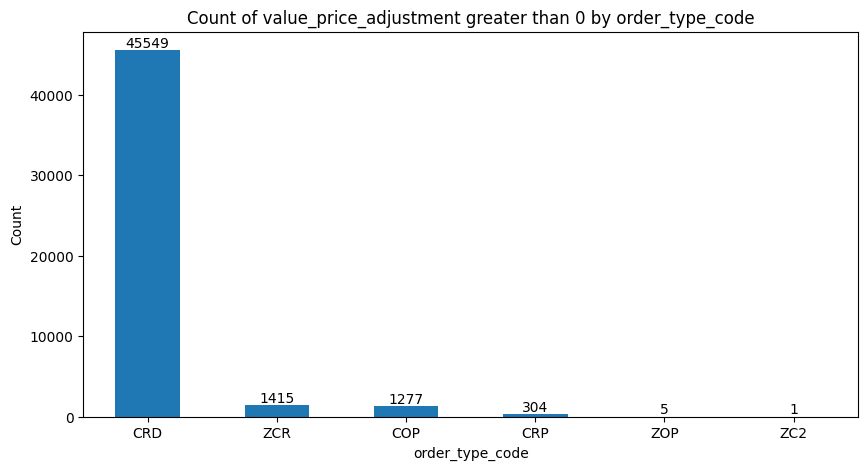

In [34]:
price_adjustment0['order_type_code'].value_counts().plot(kind='bar', figsize=(10, 5))
for i, v in enumerate(price_adjustment0['order_type_code'].value_counts()):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.title("Count of value_price_adjustment greater than 0 by order_type_code")
plt.ylabel("Count")
plt.xticks(rotation=0);

In [35]:
#inpect value_sales lower than value_cost
value_sales_cost = df[df['value_sales'] < df['value_cost']][['item_code', 'value_sales', 'value_cost', 'value_quantity', 'value_price_adjustment', 'order_type_code']]
print(f"count of value_sales lower than value_cost: {value_sales_cost.shape[0]}")
value_sales_cost.head()

count of value_sales lower than value_cost: 148672


,item_code,value_sales,value_cost,value_quantity,value_price_adjustment,order_type_code
61,GENIE14WCDLES,-6.38,-4.2428,-2.0,0,CDG
115,GENIE18WCDLES,-95.70,-63.6420,-30.0,0,CDG
176,GENIE11WWWES,-3.28,-1.9300,-1.0,0,CRR
182,GENIE14WCDLBC,-77.56,-59.3992,-28.0,0,CDG
220,GENIE11WCDLES,-2.90,-1.9300,-1.0,0,CRR


In [ ]:
value_sales_cost[value_sales_cost['value_sales'] > 0].head()

,item_code,value_sales,value_cost,value_quantity,value_price_adjustment,order_type_code
371,GENIE11WCDLES,25.44,25.4568,12.0,0,CSH
1080,GLB50/E,306.00,1043.4600,102.0,0,EXP
1468,F5124RAA4AX1,2960.00,2967.6160,40.0,0,NOR
1677,GENIE14WWWES,12.72,12.7284,6.0,0,CSH
2020,ALC-A0399MM/CKD,881.44,995.0800,100.0,0,NOR


In [37]:
#inspect value_quantity equal to 0
value_quantity0 = df[df['value_quantity'] == 0][['item_code', 'value_sales', 'value_cost', 'value_quantity', 'value_price_adjustment', 'order_type_code']]
print(f"count of value_quantity equal to 0: {value_quantity0.shape[0]}")
value_quantity0.head()

count of value_quantity equal to 0: 48554


,item_code,value_sales,value_cost,value_quantity,value_price_adjustment,order_type_code
630,GENIE18WCDLES,-79.75,0.0,0.0,1,CRD
1000,GENIE14WCDLBC,-70.56,0.0,0.0,1,CRD
1001,GENIE14WCDLBC,-1008.42,0.0,0.0,1,CRD
2376,GIGA2000MH,-68.08,0.0,0.0,1,CRD
2730,GENIE18WWWBC,-3.48,0.0,0.0,1,CRD


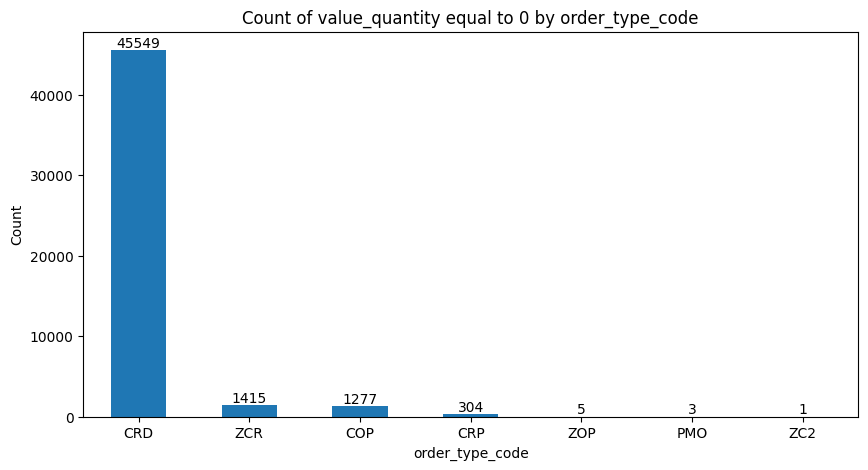

In [38]:
value_quantity0['order_type_code'].value_counts().plot(kind='bar', figsize=(10, 5))
for i, v in enumerate(value_quantity0['order_type_code'].value_counts()):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.title("Count of value_quantity equal to 0 by order_type_code")
plt.ylabel("Count")
plt.xticks(rotation=0);


In [39]:
#inspect CDG order_type_code
cdg = df[df['order_type_code'] == 'CDG'][['item_code', 'value_sales', 'value_cost', 'value_quantity', 'value_price_adjustment', 'order_type_code']]
print(f"count of CDG order_type_code: {cdg.shape[0]}")
cdg.head()


count of CDG order_type_code: 12283


,item_code,value_sales,value_cost,value_quantity,value_price_adjustment,order_type_code
61,GENIE14WCDLES,-6.38,-4.2428,-2.0,0,CDG
115,GENIE18WCDLES,-95.70,-63.6420,-30.0,0,CDG
182,GENIE14WCDLBC,-77.56,-59.3992,-28.0,0,CDG
312,GENIE8WWWES,-3.28,-2.1214,-1.0,0,CDG
351,GENIE11WWWES,-3.28,-2.1214,-1.0,0,CDG


In [ ]:
cdg.describe(include='all').round(2)

,item_code,value_sales,value_cost,value_quantity,value_price_adjustment,order_type_code
count,12283,12283.00,12283.00,12283.00,12283.0,12283
unique,1704,NaN,NaN,NaN,NaN,1
top,PND236EL,NaN,NaN,NaN,NaN,CDG
freq,746,NaN,NaN,NaN,NaN,12283
mean,NaN,-38.68,-23.76,-1.87,0.0,NaN
std,NaN,86.19,49.72,4.05,0.0,NaN
min,NaN,-7665.00,-4183.83,-140.00,0.0,NaN
25%,NaN,-48.10,-29.90,-2.00,0.0,NaN
50%,NaN,-28.13,-16.74,-1.00,0.0,NaN
75%,NaN,-10.72,-6.90,-1.00,0.0,NaN


In [41]:
df['bonus_group_code'].value_counts(dropna=False)

bonus_group_code
Trade           1652568
Professional     335814
Name: count, dtype: int64

In [42]:
#inspect sales geater than 0
sales0 = df[df['value_sales'] > 0][['item_code', 'value_sales', 'value_cost', 'value_quantity', 'value_price_adjustment', 'order_type_code']]
print(f"count of sales greater than 0: {sales0.shape[0]}")
sales0.head()

count of sales greater than 0: 1852545


,item_code,value_sales,value_cost,value_quantity,value_price_adjustment,order_type_code
0,GENIE8WWWBC,218.40,178.1976,84.0,0,NOR
1,GENIE8WWWBC,38.28,25.4568,12.0,0,NOR
2,GENIE8WWWBC,40.20,25.4568,12.0,0,NOR
3,GENIE8WWWBC,20.10,12.7284,6.0,0,EDI
4,GENIE8WWWBC,19.14,12.7284,6.0,0,EDI


## 4. Explore Relationships and Correlations
- Pairwise Plots: Use scatterplot matrices or pair plots to understand relationships between numerical variables.
- Correlation Matrix: Generate a heatmap for correlations between numerical variables, helping identify multicollinearity or highly correlated variables.

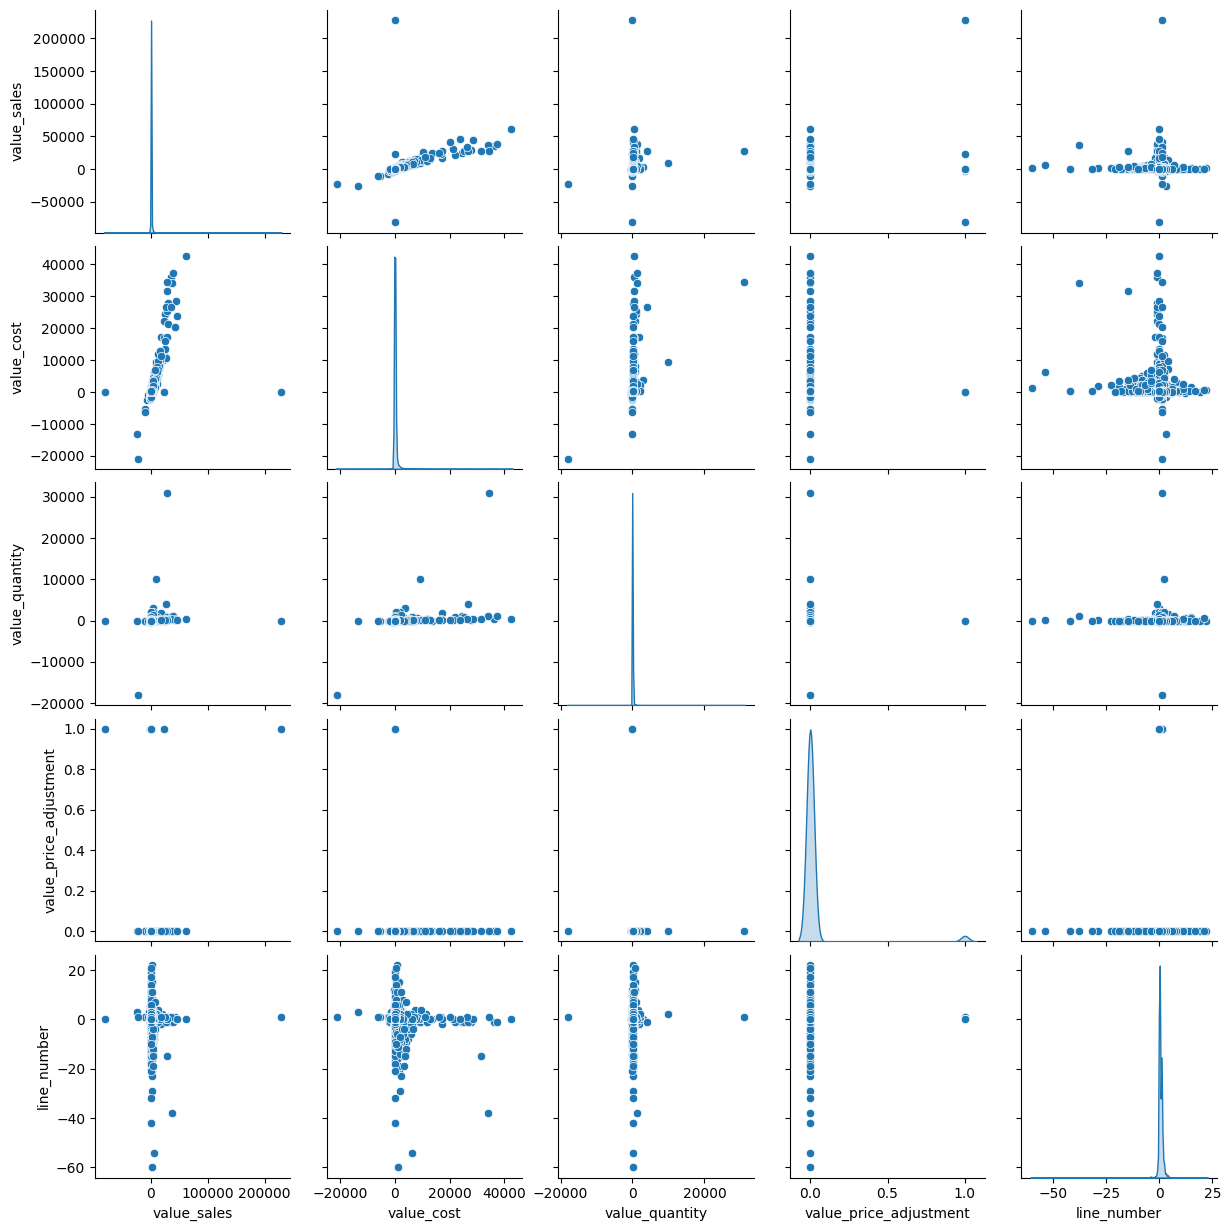

In [43]:
sns.pairplot(data=df.select_dtypes(exclude=['object', 'datetime']).sample(10000), diag_kind='kde')

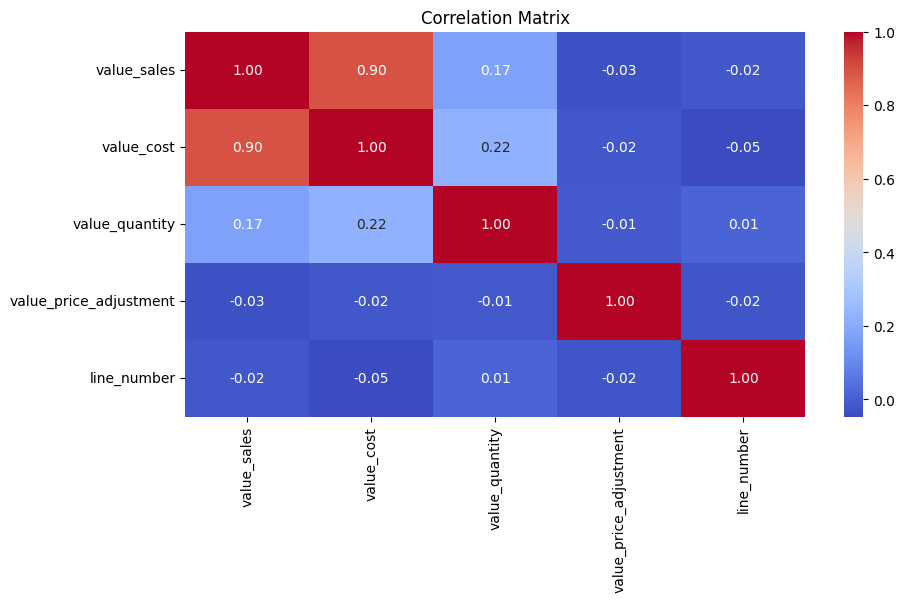

In [44]:
corr = df.select_dtypes(exclude=['object', 'datetime']).corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Matrix')
plt.show()

## 5. Univariate Analysis
- Numerical Variables: Histograms, density plots, or boxplots help assess distribution.
- Categorical Variables: Bar plots or pie charts to show frequency distribution.

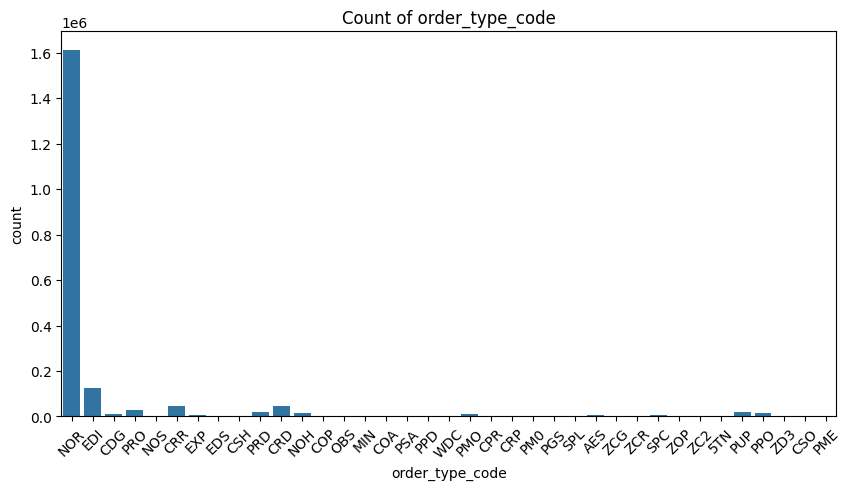

In [45]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='order_type_code')
plt.title('Count of order_type_code')
plt.xticks(rotation=45)
plt.show()

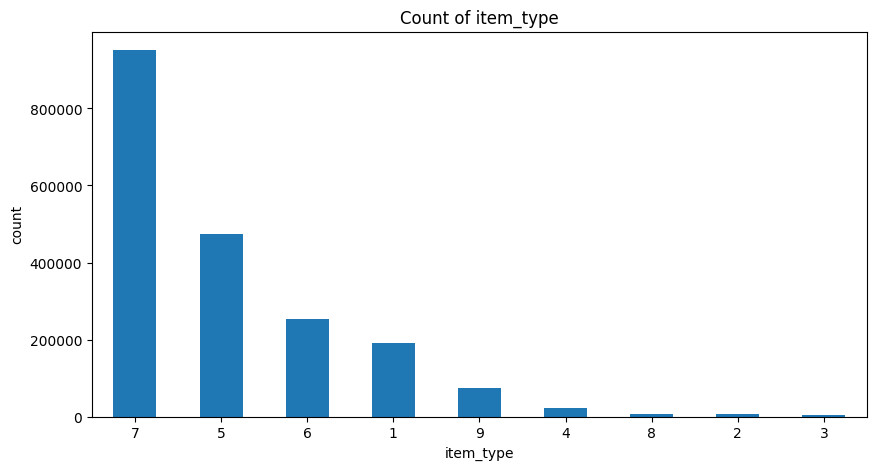

In [ ]:
df['item_type'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.title('Count of item_type')
plt.ylabel('count')
plt.xticks(rotation=0);

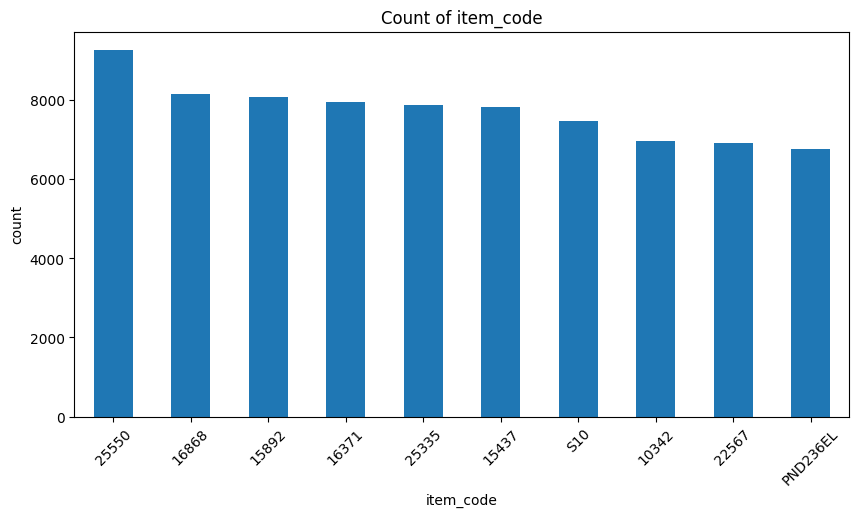

In [ ]:
df['item_code'].value_counts()[:10].plot(kind='bar', figsize=(10, 5))
plt.title('Count of item_code')
plt.ylabel('count')
plt.xticks(rotation=45);

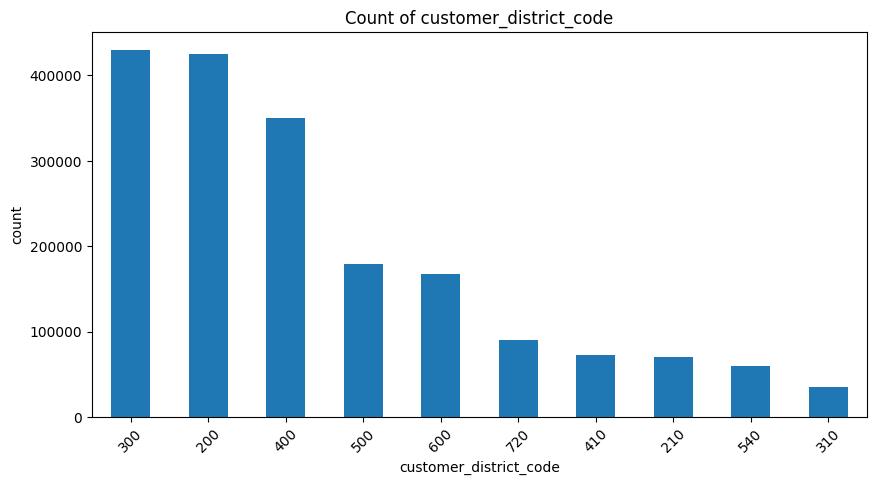

In [ ]:
df['customer_district_code'].value_counts()[:10].plot(kind='bar', figsize=(10, 5))
plt.title('Count of customer_district_code')
plt.ylabel('count')
plt.xticks(rotation=45);

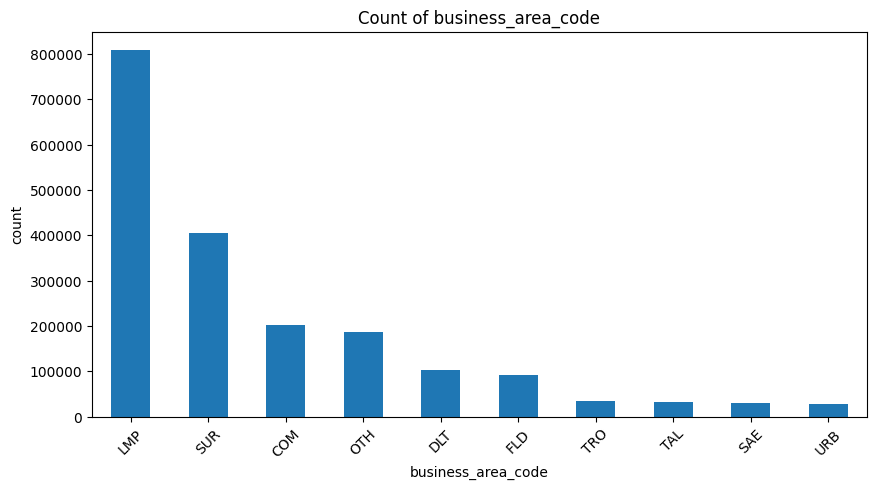

In [49]:
df['business_area_code'].value_counts()[:10].plot(kind='bar', figsize=(10, 5))
plt.title('Count of business_area_code')
plt.ylabel('count')
plt.xticks(rotation=45);

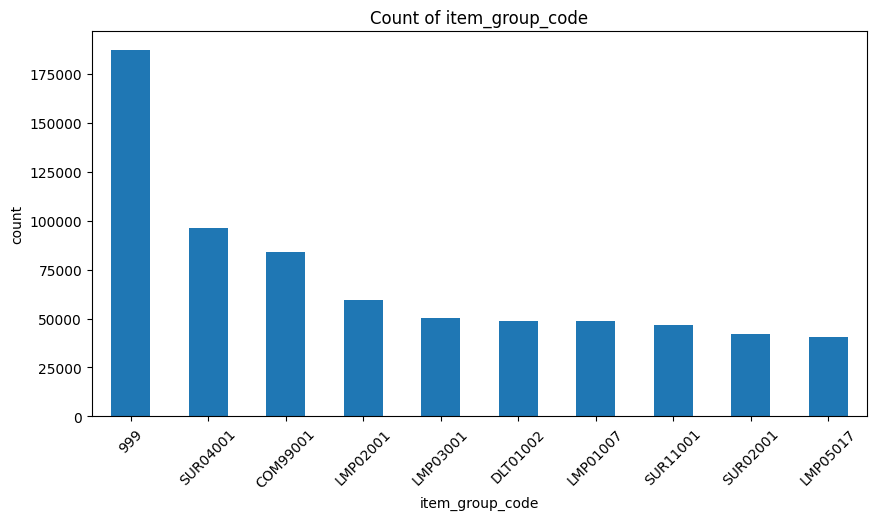

In [50]:
df['item_group_code'].value_counts()[:10].plot(kind='bar', figsize=(10, 5))
plt.title('Count of item_group_code')
plt.ylabel('count')
plt.xticks(rotation=45);

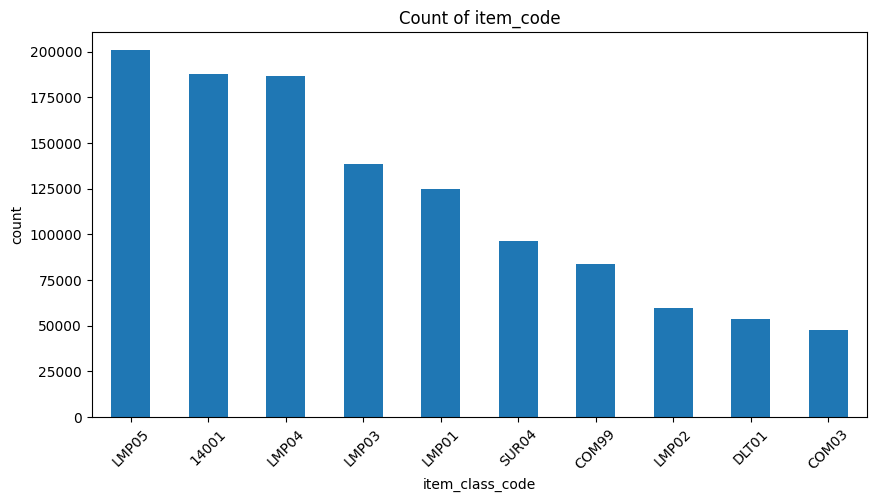

In [51]:
df['item_class_code'].value_counts()[:10].plot(kind='bar', figsize=(10, 5))
plt.title('Count of item_code')
plt.ylabel('count')
plt.xticks(rotation=45);

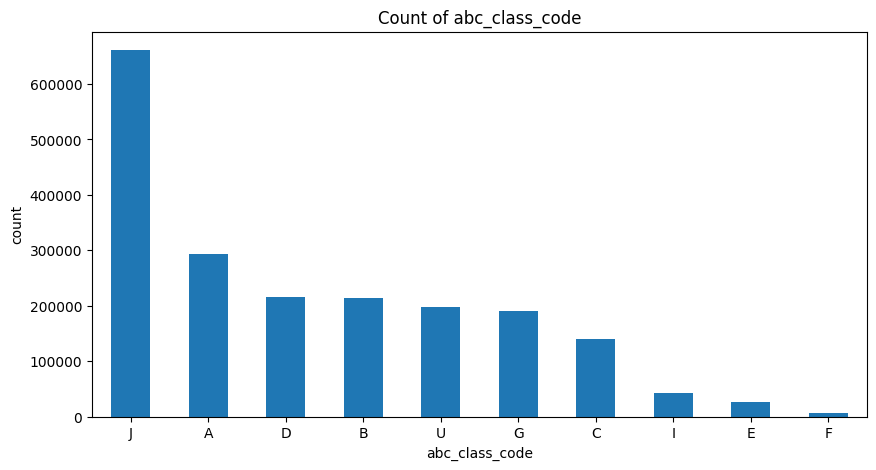

In [52]:
df['abc_class_code'].value_counts()[:10].plot(kind='bar', figsize=(10, 5))
plt.title('Count of abc_class_code')
plt.ylabel('count')
plt.xticks(rotation=0);

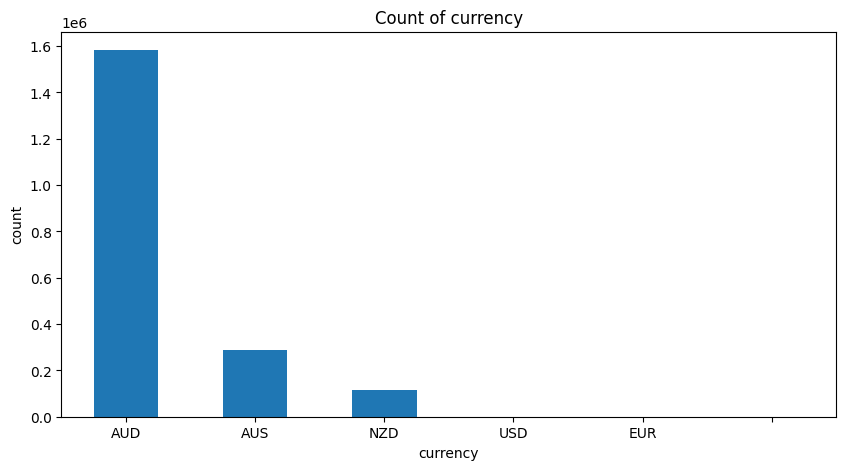

In [53]:
df['currency'].value_counts()[:10].plot(kind='bar', figsize=(10, 5))
plt.title('Count of currency')
plt.ylabel('count')
plt.xticks(rotation=0);

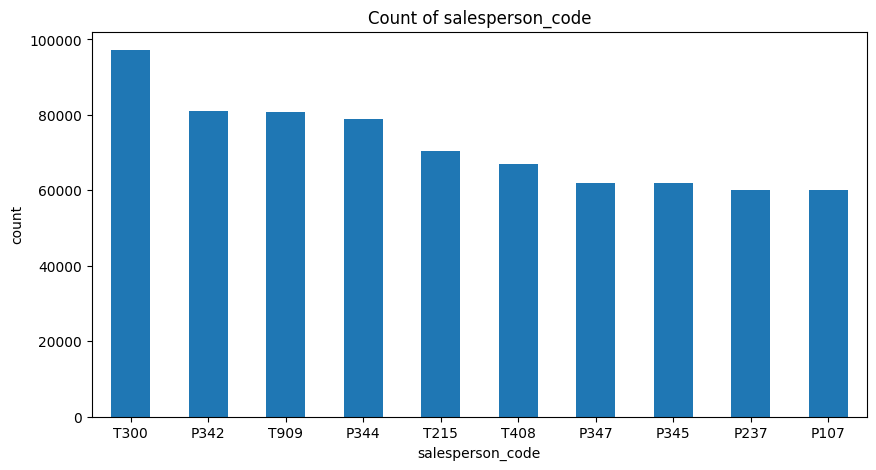

In [54]:
df['salesperson_code'].value_counts()[:10].plot(kind='bar', figsize=(10, 5))
plt.title('Count of salesperson_code')
plt.ylabel('count')
plt.xticks(rotation=0);

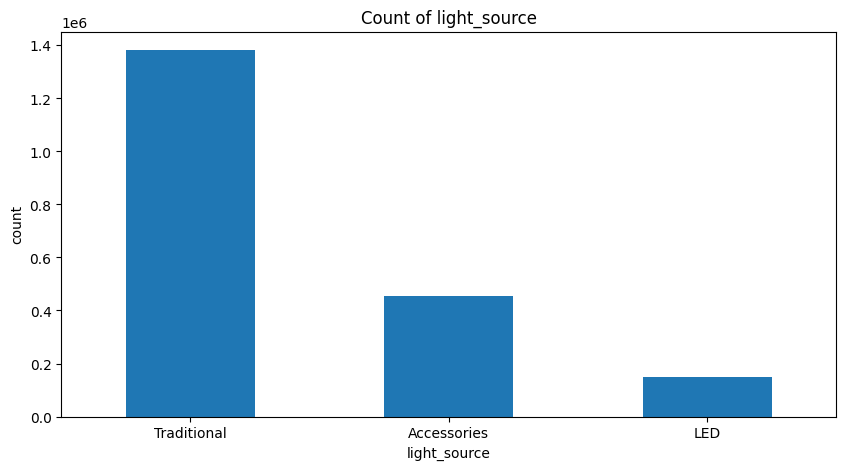

In [55]:
df['light_source'].value_counts()[:10].plot(kind='bar', figsize=(10, 5))
plt.title('Count of light_source')
plt.ylabel('count')
plt.xticks(rotation=0);

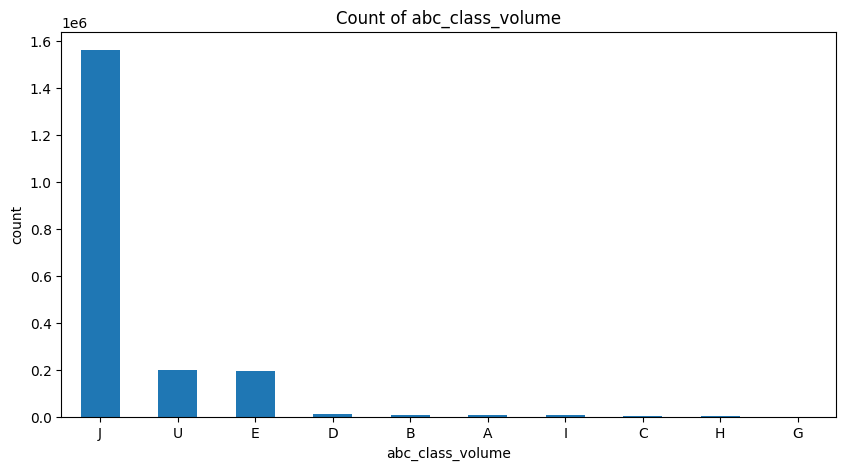

In [56]:
df['abc_class_volume'].value_counts()[:10].plot(kind='bar', figsize=(10, 5))
plt.title('Count of abc_class_volume')
plt.ylabel('count')
plt.xticks(rotation=0);

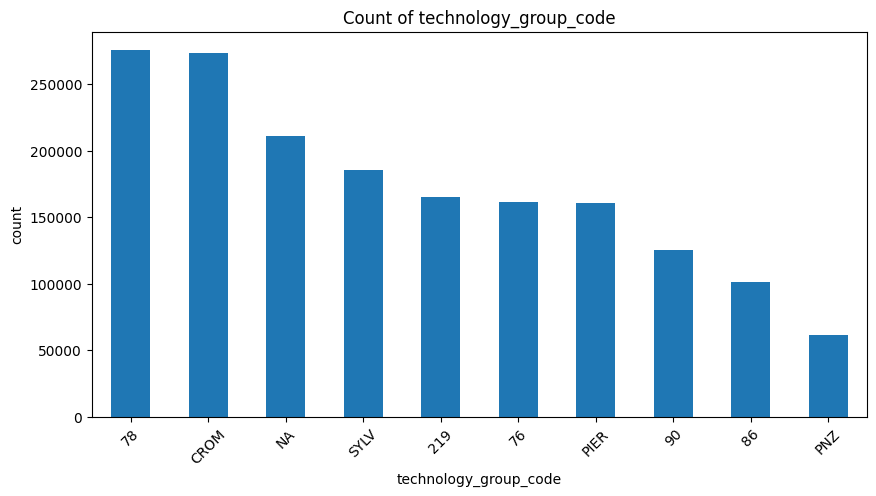

In [57]:
df['technology_group_code'].value_counts()[:10].plot(kind='bar', figsize=(10, 5))
plt.title('Count of technology_group_code')
plt.ylabel('count')
plt.xticks(rotation=45);

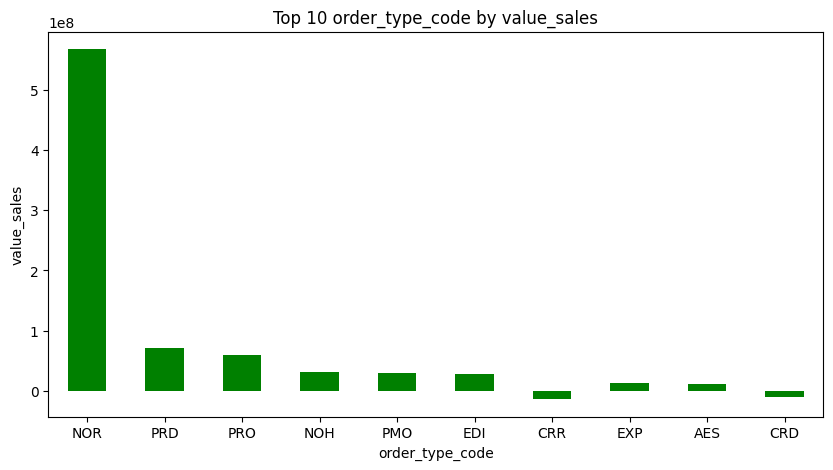

In [58]:
df.groupby('order_type_code')['value_sales'].sum().sort_values(ascending=False,key=abs)[:10].plot(kind='bar', figsize=(10, 5), color='green')
plt.title('Top 10 order_type_code by value_sales')
plt.ylabel('value_sales')
plt.xticks(rotation=0);


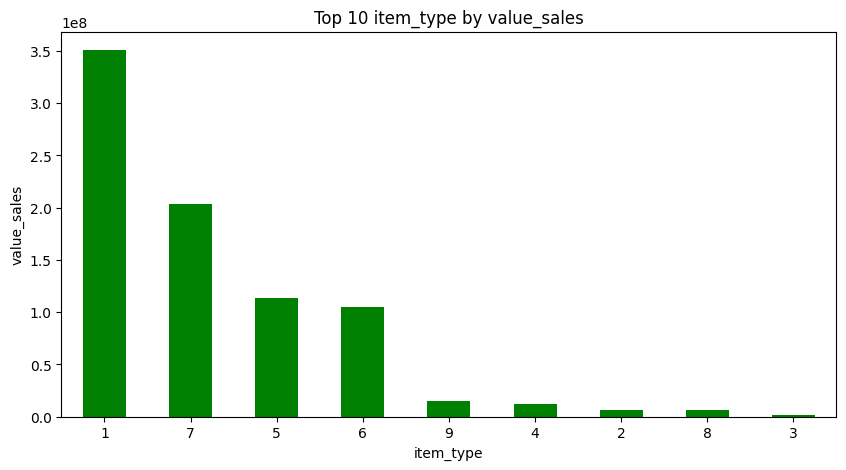

In [59]:
df.groupby('item_type')['value_sales'].sum().sort_values(ascending=False,key=abs)[:10].plot(kind='bar', figsize=(10, 5), color='green')
plt.title('Top 10 item_type by value_sales')
plt.ylabel('value_sales')
plt.xticks(rotation=0);


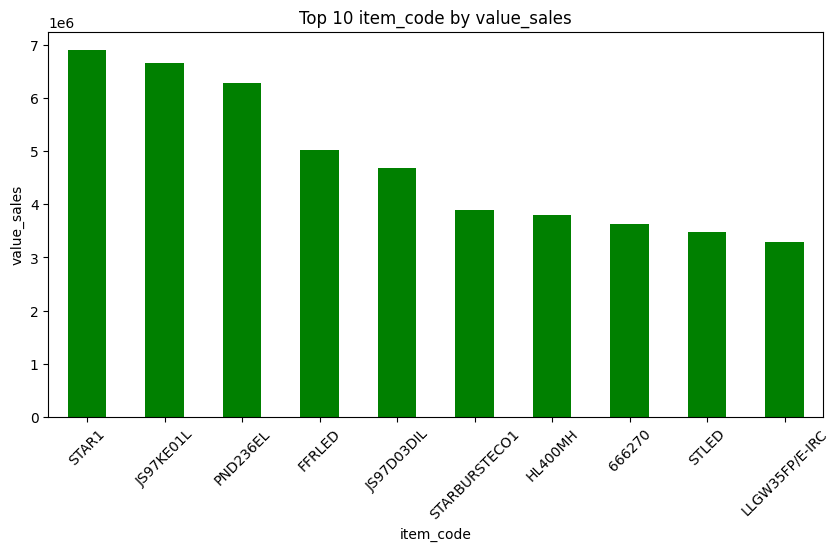

In [60]:
df.groupby('item_code')['value_sales'].sum().sort_values(ascending=False,key=abs)[:10].plot(kind='bar', figsize=(10, 5), color='green')
plt.title('Top 10 item_code by value_sales')
plt.ylabel('value_sales')
plt.xticks(rotation=45);


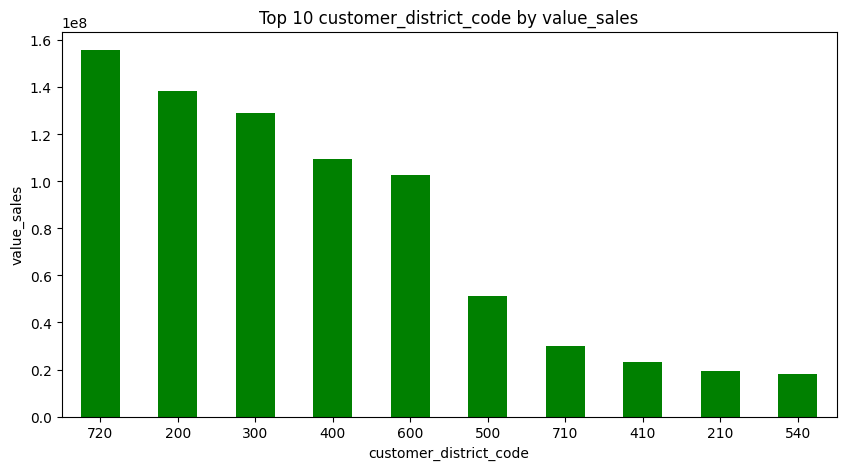

In [61]:
df.groupby('customer_district_code')['value_sales'].sum().sort_values(ascending=False,key=abs)[:10].plot(kind='bar', figsize=(10, 5), color='green')
plt.title('Top 10 customer_district_code by value_sales')
plt.ylabel('value_sales')
plt.xticks(rotation=0);

## 6. Bivariate Analysis
- Numerical vs. Numerical: Scatter plots or line plots for time series.
- Numerical vs. Categorical: Boxplots or violin plots to see distributions across categories.
- Categorical vs. Categorical: Cross-tabulations or stacked bar plots to understand relationships.


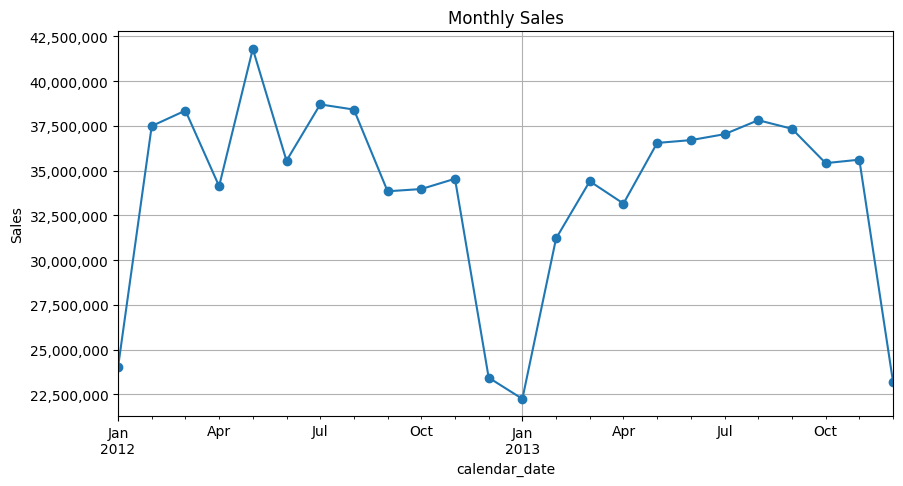

In [62]:
# Assuming df is already defined and contains the necessary data
df.groupby(df['calendar_date'].dt.to_period('M'))['value_sales'].sum().plot(marker='o', figsize=(10, 5))


# Format y-axis
formatter = FuncFormatter(lambda x, pos: f'{int(x):,}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Monthly Sales')
plt.ylabel('Sales')
plt.grid()
plt.show()

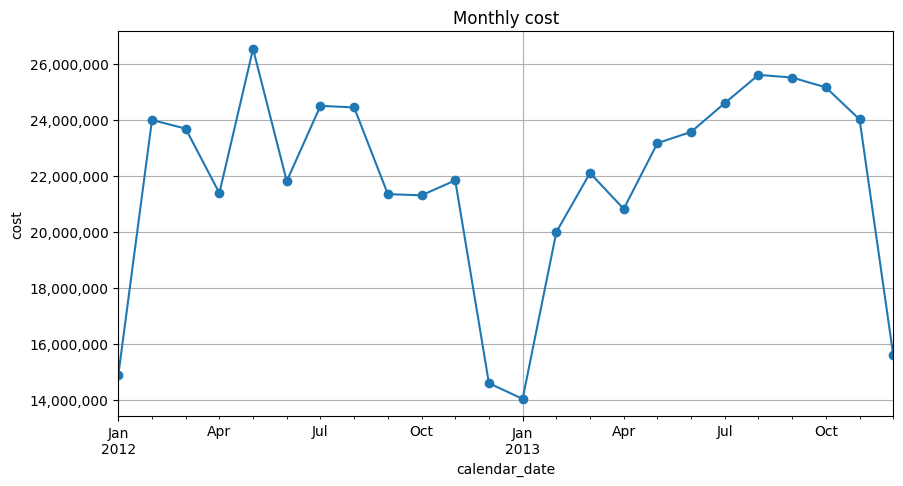

In [63]:
# Assuming df is already defined and contains the necessary data
df.groupby(df['calendar_date'].dt.to_period('M'))['value_cost'].sum().plot(marker='o', figsize=(10, 5))

# Format y-axis
formatter = FuncFormatter(lambda x, pos: f'{int(x):,}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Monthly cost')
plt.ylabel('cost')
plt.grid()
plt.show()

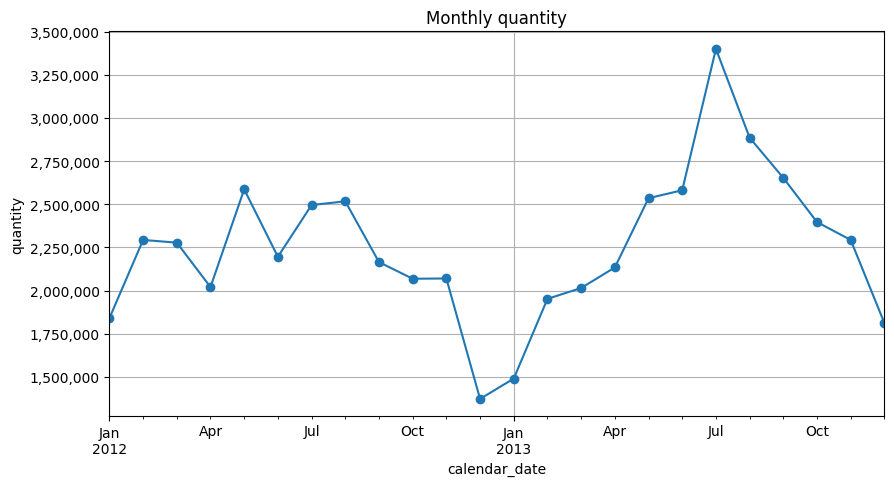

In [64]:
# Assuming df is already defined and contains the necessary data
df.groupby(df['calendar_date'].dt.to_period('M'))['value_quantity'].sum().plot(marker='o', figsize=(10, 5))

# Format y-axis
formatter = FuncFormatter(lambda x, pos: f'{int(x):,}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Monthly quantity')
plt.ylabel('quantity')
plt.grid()
plt.show()

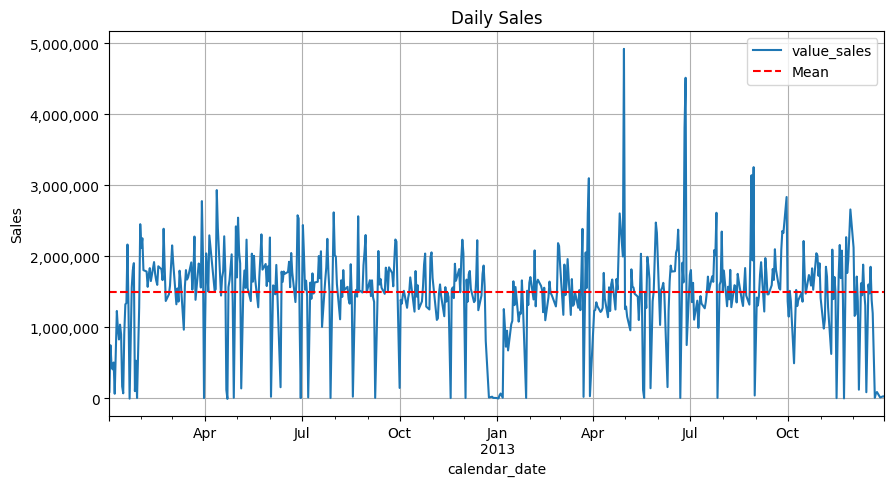

In [65]:
# Assuming df is already defined and contains the necessary data
df.groupby(df['calendar_date'].dt.to_period('D'))['value_sales'].sum().plot( figsize=(10, 5))
#mean line
mean = df.groupby(df['calendar_date'].dt.to_period('D'))['value_sales'].sum().mean()
plt.axhline(mean, color='red', linestyle='--', label='Mean')

# Format y-axis
formatter = FuncFormatter(lambda x, pos: f'{int(x):,}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Daily Sales')
plt.ylabel('Sales')
plt.grid()
plt.legend()
plt.show()

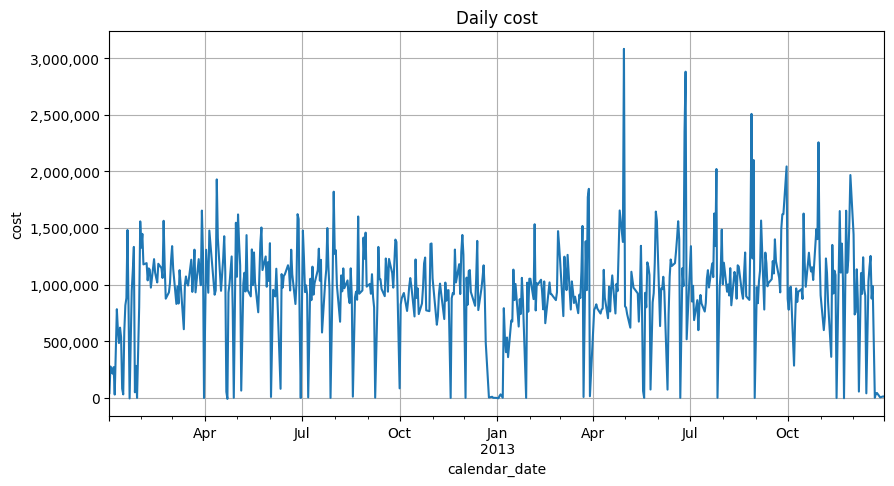

In [66]:
# Assuming df is already defined and contains the necessary data
df.groupby(df['calendar_date'].dt.to_period('D'))['value_cost'].sum().plot( figsize=(10, 5))

# Format y-axis
formatter = FuncFormatter(lambda x, pos: f'{int(x):,}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Daily cost')
plt.ylabel('cost')
plt.grid()
plt.show()

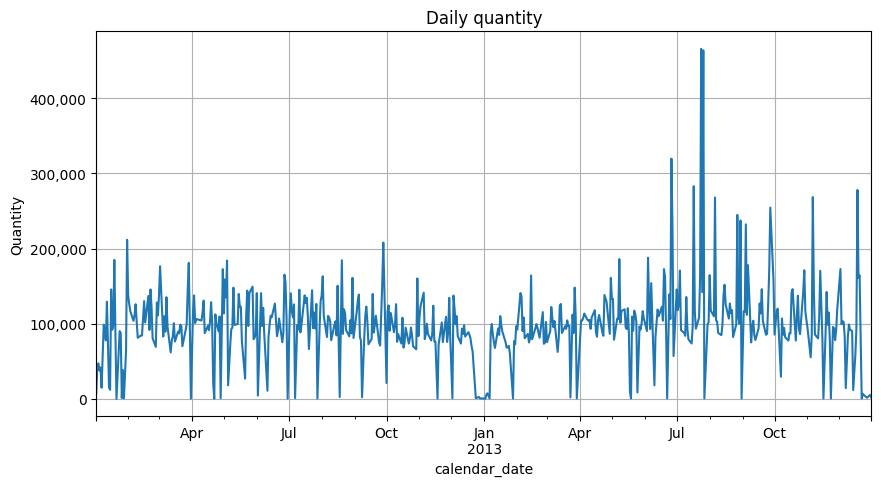

In [67]:
# Assuming df is already defined and contains the necessary data
df.groupby(df['calendar_date'].dt.to_period('D'))['value_quantity'].sum().plot( figsize=(10, 5))

# Format y-axis
formatter = FuncFormatter(lambda x, pos: f'{int(x):,}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Daily quantity')
plt.ylabel('Quantity')
plt.grid()
plt.show()

In [68]:
#filter order_date greater than 2012-01-01
df = df[df['order_date'] >= '2012-01-01']

C:\Users\exp55\AppData\Local\Temp\ipykernel_568\92986582.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=grouped_df, x='order_date', y='value_sales', hue='light_source', ci=None, palette='tab10')


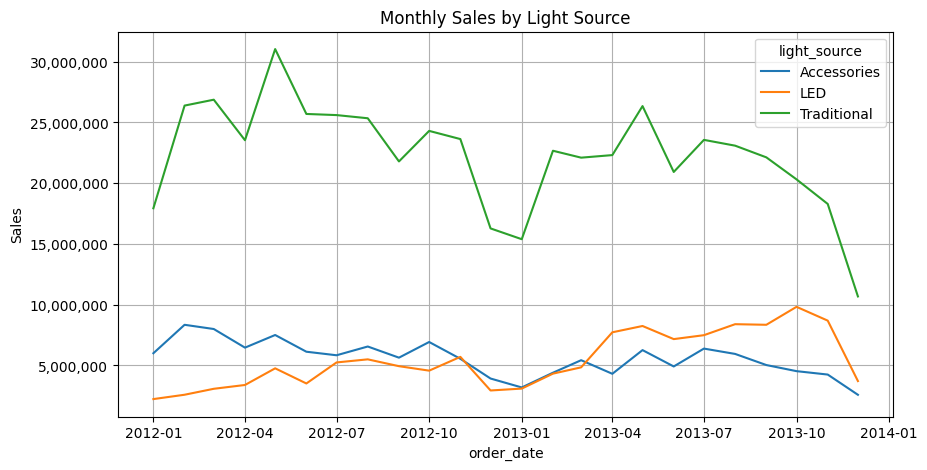

In [69]:
grouped_df = df.groupby([df['order_date'].dt.to_period('M'), 'light_source'])['value_sales'].sum().reset_index()
grouped_df['order_date'] = grouped_df['order_date'].dt.to_timestamp()
plt.figure(figsize=(10, 5))
sns.lineplot(data=grouped_df, x='order_date', y='value_sales', hue='light_source', ci=None, palette='tab10')
plt.title('Monthly Sales by Light Source')
plt.ylabel('Sales')
plt.grid()
formatter = FuncFormatter(lambda x, pos: f'{int(x):,}')
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

C:\Users\exp55\AppData\Local\Temp\ipykernel_568\2808810961.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=grouped_df, x='invoice_date', y='value_quantity', hue='light_source', ci=None, palette='tab10')


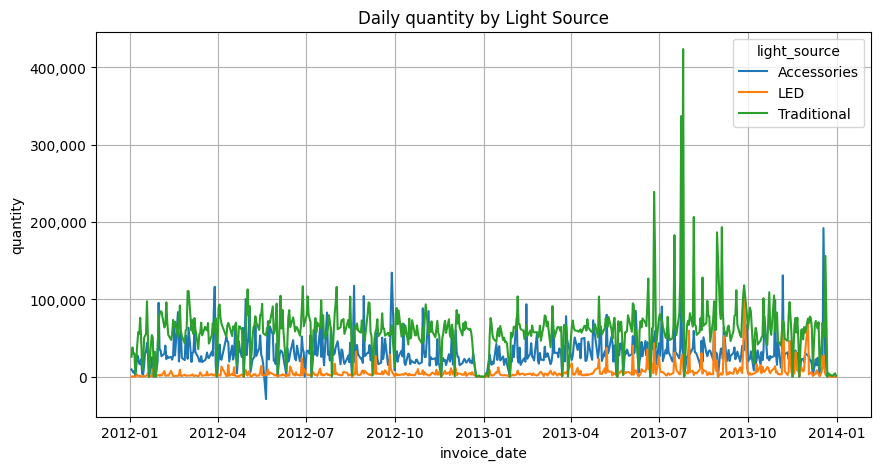

In [70]:
grouped_df = df.groupby([df['invoice_date'].dt.to_period('D'), 'light_source'])['value_quantity'].sum().reset_index()
grouped_df['invoice_date'] = grouped_df['invoice_date'].dt.to_timestamp()
plt.figure(figsize=(10, 5))
sns.lineplot(data=grouped_df, x='invoice_date', y='value_quantity', hue='light_source', ci=None, palette='tab10')
plt.title('Daily quantity by Light Source')
plt.ylabel('quantity')
plt.grid()
formatter = FuncFormatter(lambda x, pos: f'{int(x):,}')
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

## 7. Feature Engineering and Initial Hypotheses
- Create any initial features or transformations you suspect may be useful.
- Formulate hypotheses on relationships or trends that you aim to test in later stages.

In [71]:
test = df.dropna()
test['Profit'] = test['value_sales'] - test['value_cost']
test['Profit_margin'] = test['Profit'] / test['value_sales']
test['unit_price'] = test['value_sales'] / test['value_quantity']
print(f"count of missing values: {test.shape[0]}")
test = test[test['value_sales'] != 0]
test = test[test['Profit'] != 0]
test = test[test['value_cost'] != 0]
test = test[test['Profit_margin'] > 0]
test['year'] = test['calendar_date'].dt.year
#filter order date greater than 2012
test = test[test['order_date'] >= '2012-01-01']
print(f"count of value_sales not equal to 0: {test.shape[0]}")

count of missing values: 1977223
count of value_sales not equal to 0: 1886935


### Time Series

C:\Users\exp55\AppData\Local\Temp\ipykernel_568\1117662174.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=grouped_df, x='order_date', y='Profit_margin', hue='light_source', ci=None, palette='tab10', marker='o')


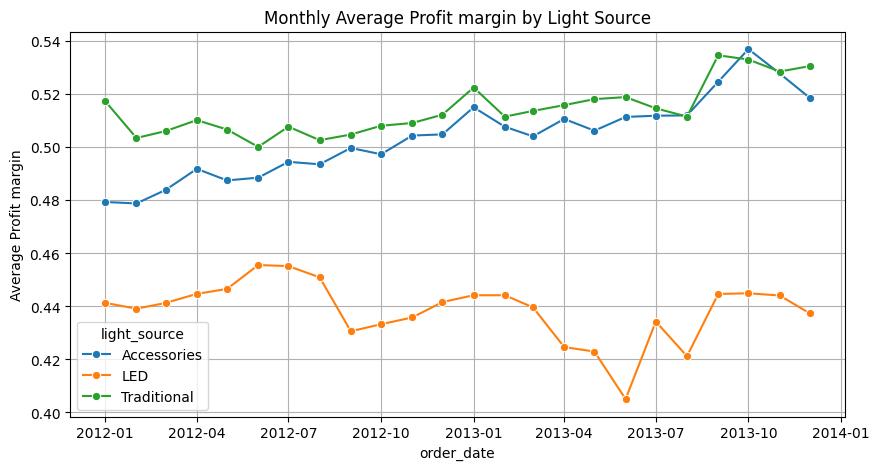

In [72]:
grouped_df = test.groupby([test['order_date'].dt.to_period('M'), 'light_source'])['Profit_margin'].mean().reset_index()
grouped_df['order_date'] = grouped_df['order_date'].dt.to_timestamp()
plt.figure(figsize=(10, 5))
sns.lineplot(data=grouped_df, x='order_date', y='Profit_margin', hue='light_source', ci=None, palette='tab10', marker='o')
plt.title('Monthly Average Profit margin by Light Source')
plt.ylabel('Average Profit margin')
plt.grid()
plt.show()

C:\Users\exp55\AppData\Local\Temp\ipykernel_568\2335753135.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=grouped_df, x='order_date', y='Profit', hue='light_source', ci=None, palette='tab10', marker='o')


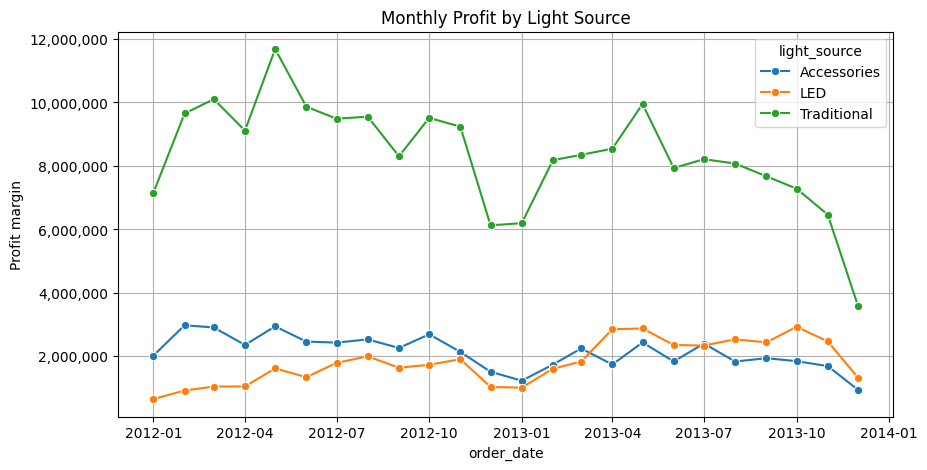

In [73]:
grouped_df = test.groupby([test['order_date'].dt.to_period('M'), 'light_source'])['Profit'].sum().reset_index()
grouped_df['order_date'] = grouped_df['order_date'].dt.to_timestamp()
plt.figure(figsize=(10, 5))
sns.lineplot(data=grouped_df, x='order_date', y='Profit', hue='light_source', ci=None, palette='tab10', marker='o')
plt.title('Monthly Profit by Light Source')
plt.ylabel('Profit margin')
plt.grid()
formatter = FuncFormatter(lambda x, pos: f'{int(x):,}')
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

### Histrogram

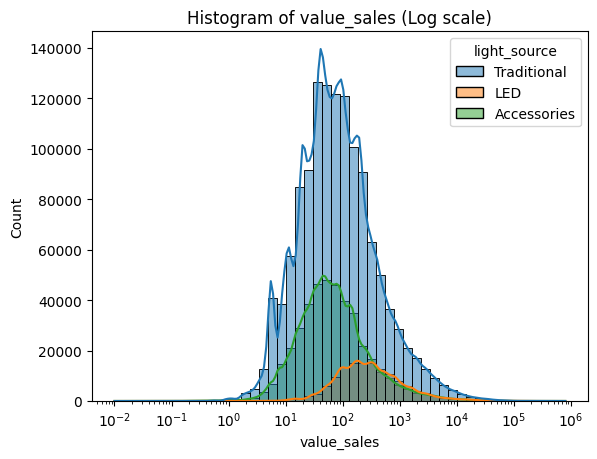

In [74]:
sns.histplot(data=test, x='value_sales', bins=50, kde=True,log_scale=True, hue='light_source')
plt.title("Histogram of value_sales (Log scale)")
plt.show()

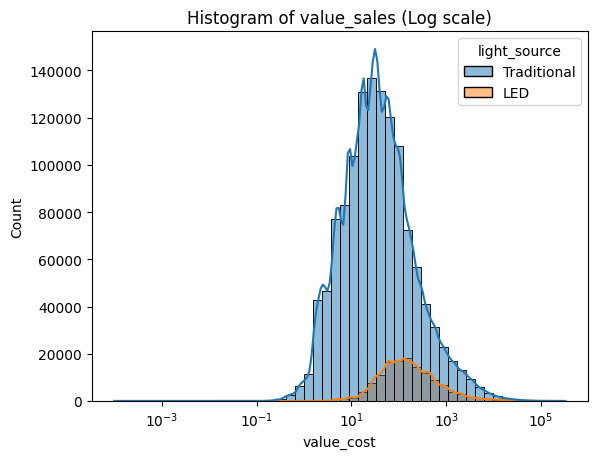

In [75]:
#select light_source = 'LED' or 'Traditional'
sns.histplot(data=test[test['light_source'].isin(['LED', 'Traditional'])], x='value_cost', bins=50, kde=True,log_scale=True, hue='light_source')
plt.title("Histogram of value_sales (Log scale)")
plt.show()

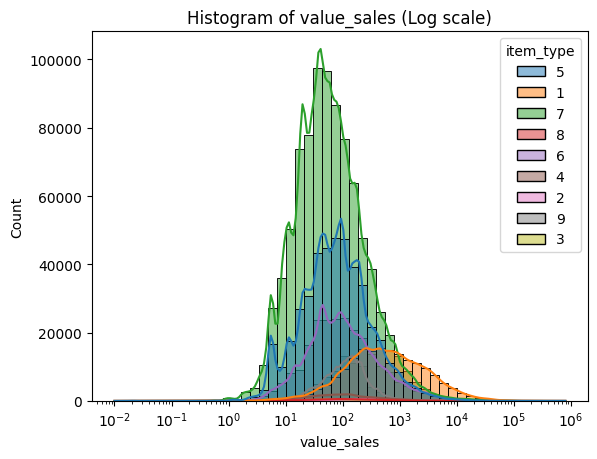

In [76]:
sns.histplot(data=test, x='value_sales', bins=50, kde=True,log_scale=True, hue='item_type')
plt.title("Histogram of value_sales (Log scale)")
plt.show()

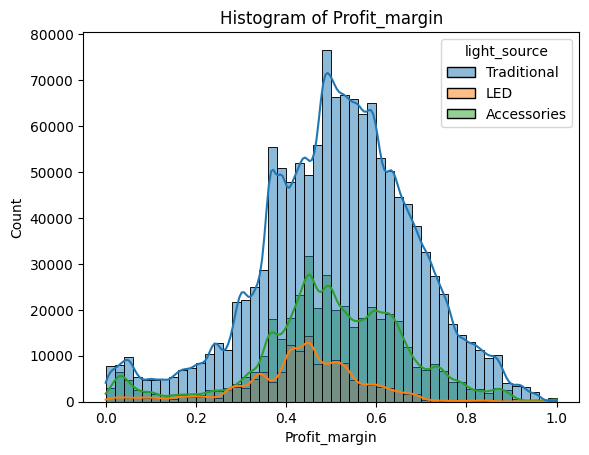

In [77]:
sns.histplot(data=test, x='Profit_margin', bins=50, kde=True,log_scale=False, hue='light_source')
plt.title("Histogram of Profit_margin")
plt.show()

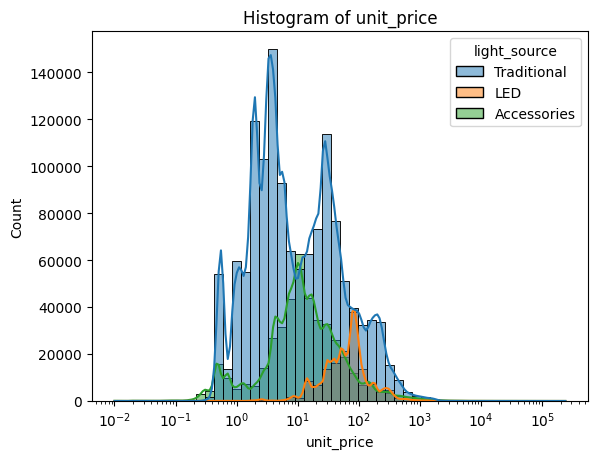

In [78]:
sns.histplot(data=test, x='unit_price', bins=50, kde=True,log_scale=True, hue='light_source')
plt.title("Histogram of unit_price")
plt.show()

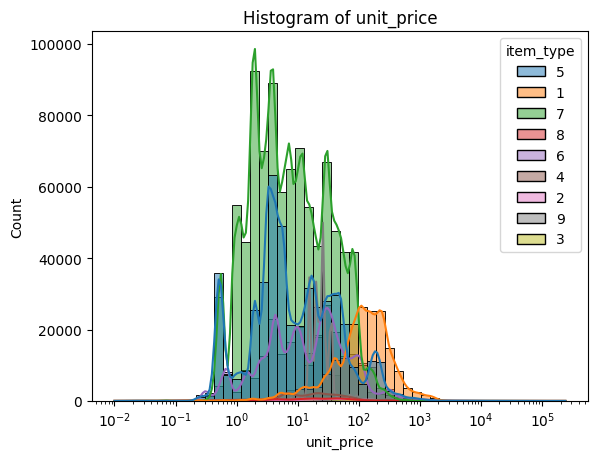

In [79]:
sns.histplot(data=test, x='unit_price', bins=50, kde=True,log_scale=True, hue='item_type')
plt.title("Histogram of unit_price")
plt.show()

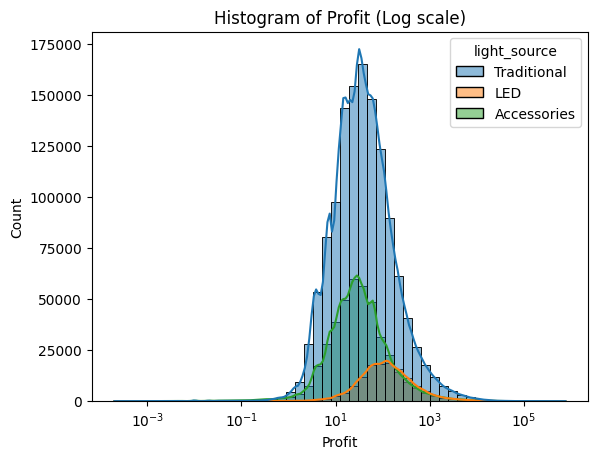

In [80]:
sns.histplot(data=test, x='Profit', bins=50, kde=True,log_scale=True, hue='light_source')
plt.title("Histogram of Profit (Log scale)")
plt.show()

<Axes: xlabel='Profit', ylabel='Count'>

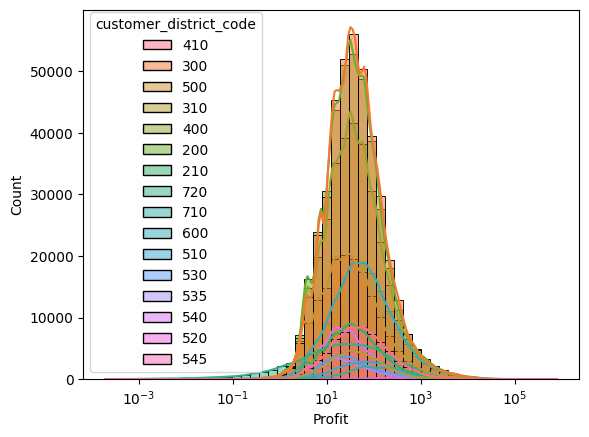

In [81]:
sns.histplot(data=test, x='Profit', bins=50, kde=True,log_scale=True, hue='customer_district_code')

<Axes: xlabel='Profit', ylabel='Count'>

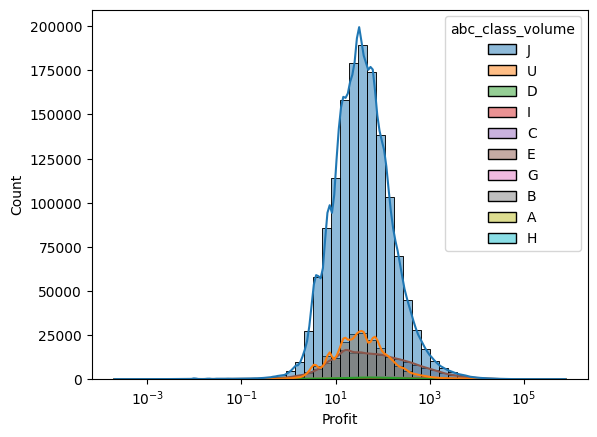

In [82]:
sns.histplot(data=test, x='Profit', bins=50, kde=True,log_scale=True, hue='abc_class_volume')

### returned or damaged item analysis

In [83]:
# Assuming 'CDG' and 'CRR' represent returned and damaged orders respectively
returned_or_damaged = df[df['order_type_code'].isin(['CDG', 'CRR'])]

# Count the number of returned/damaged goods by item_code
item_damage_count = returned_or_damaged['item_code'].value_counts().reset_index()
item_damage_count.columns = ['item_code', 'damage_return_count']

# Count the total number of orders by item_code
total_orders_count = df['item_code'].value_counts().reset_index()
total_orders_count.columns = ['item_code', 'total_count']

# Merge the data to calculate the proportion of returns/damages
item_analysis = pd.merge(item_damage_count, total_orders_count, on='item_code', how='left')
item_analysis['damage_return_rate'] = item_analysis['damage_return_count'] / item_analysis['total_count']

# Sort to identify items with the highest damage/return rate
item_analysis = item_analysis.sort_values(by='damage_return_rate', ascending=False)
item_analysis.head()


,item_code,damage_return_count,total_count,damage_return_rate
5539,ST10M2E,1,1,1.0
5542,VDTC228EP4/X1,1,1,1.0
3087,84177,2,2,1.0
2886,99016665X,3,3,1.0
2898,P220,3,3,1.0


In [84]:
# Merge with item_type
item_type = df[['item_code', 'item_type']].drop_duplicates()
item_analysis = pd.merge(item_analysis, item_type, on='item_code', how='left')
item_analysis.head()
#merge with light_source
light_source = df[['item_code', 'light_source']].drop_duplicates()
item_analysis = pd.merge(item_analysis, light_source, on='item_code', how='left')
item_analysis.head()
#merge with item_group_code
item_group_code = df[['item_code', 'item_group_code']].drop_duplicates()
item_analysis = pd.merge(item_analysis, item_group_code, on='item_code', how='left')
item_analysis.head()

,item_code,damage_return_count,total_count,damage_return_rate,item_type,light_source,item_group_code
0,ST10M2E,1,1,1.0,1,Accessories,999
1,VDTC228EP4/X1,1,1,1.0,1,Traditional,TRO02005
2,84177,2,2,1.0,5,Accessories,COM01001
3,99016665X,3,3,1.0,1,Accessories,999
4,P220,3,3,1.0,5,Accessories,999


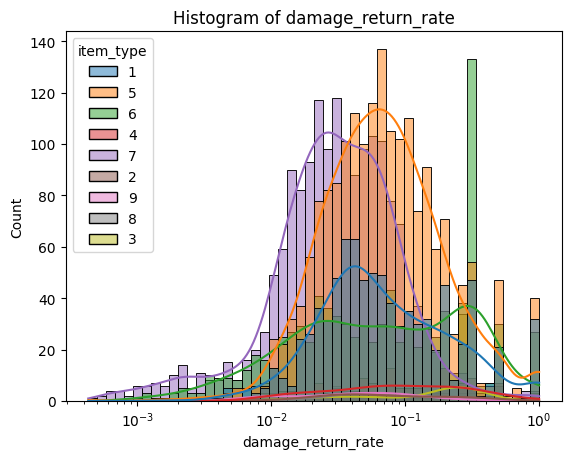

In [85]:
sns.histplot(data=item_analysis, x='damage_return_rate', bins=50, kde=True,log_scale=True, hue='item_type')
plt.title("Histogram of damage_return_rate")
plt.show()

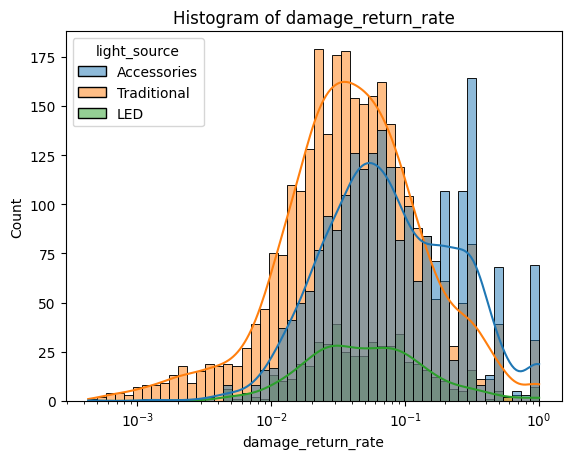

In [86]:
sns.histplot(data=item_analysis, x='damage_return_rate', bins=50, kde=True,log_scale=True, hue='light_source')
plt.title("Histogram of damage_return_rate")
plt.show()

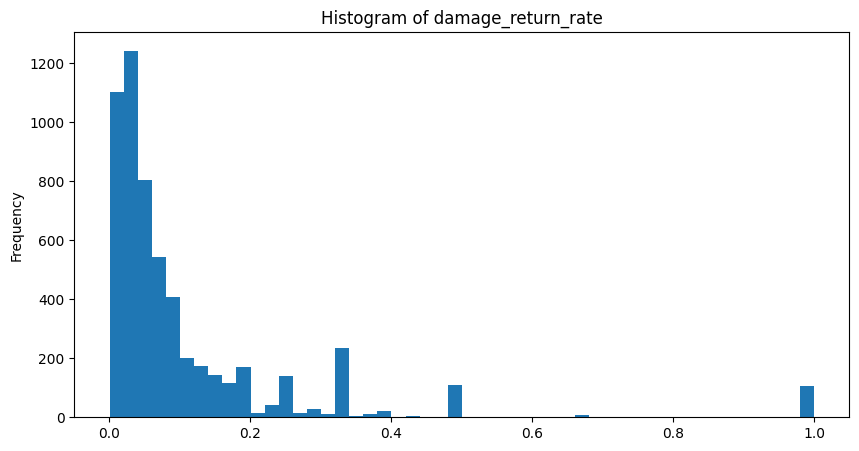

In [87]:
item_analysis['damage_return_rate'].plot(kind='hist', bins=50, figsize=(10, 5))
plt.title("Histogram of damage_return_rate")
plt.show()

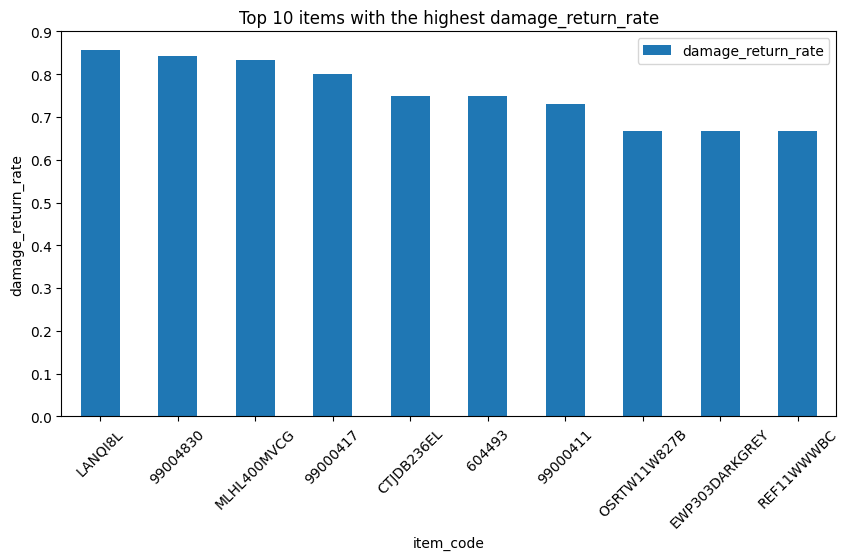

In [88]:
item_analysis[item_analysis['damage_return_rate'] < 1][:10].plot(kind='bar', x='item_code', y='damage_return_rate', figsize=(10, 5))
plt.title("Top 10 items with the highest damage_return_rate")
plt.ylabel("damage_return_rate")
plt.xticks(rotation=45)
plt.show()

### returned or damaged item type analysis

In [89]:
# Assuming df has columns 'item_code', 'item_type', 'order_type_code'

# Filter for returned or damaged items
returned_or_damaged = df[df['order_type_code'].isin(['CDG', 'CRR'])]

# Group by item_type to calculate count of returned/damaged items
item_type_damage_count = returned_or_damaged.groupby('item_type').size().reset_index(name='damage_return_count')

# Count the total number of orders by item_type
total_orders_count_by_type = df.groupby('item_type').size().reset_index(name='total_count')

# Merge to calculate return/damage rate by item_type
item_type_analysis = pd.merge(item_type_damage_count, total_orders_count_by_type, on='item_type', how='right').fillna(0)
item_type_analysis['damage_return_rate'] = item_type_analysis['damage_return_count'] / item_type_analysis['total_count']

# Sort to identify item types with the highest damage/return rate
item_type_analysis = item_type_analysis.sort_values(by='damage_return_rate', ascending=False)


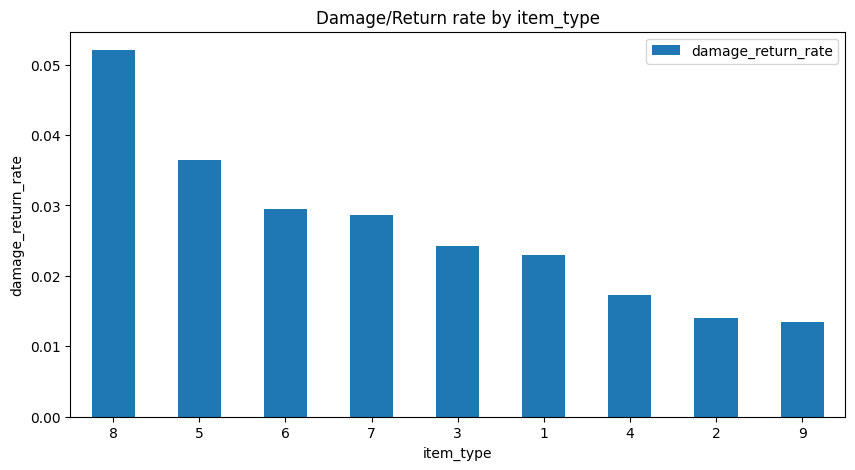

In [90]:
item_type_analysis.plot(kind='bar', x='item_type', y='damage_return_rate', figsize=(10, 5))
plt.title("Damage/Return rate by item_type")
plt.ylabel("damage_return_rate")
plt.xticks(rotation=0);

### return or damaged warehouse item analysis

In [91]:
# Filter for returned or damaged items
returned_or_damaged = df[df['order_type_code'].isin(['CDG', 'CRR'])]

# Group by warehouse_code to calculate count of returned/damaged items
warehouse_damage_count = returned_or_damaged.groupby('warehouse_code').size().reset_index(name='damage_return_count')

# Count the total number of orders by warehouse_code
total_orders_count_by_warehouse = df.groupby('warehouse_code').size().reset_index(name='total_count')

# Merge to calculate return/damage rate by warehouse_code
warehouse_analysis = pd.merge(warehouse_damage_count, total_orders_count_by_warehouse, on='warehouse_code', how='right').fillna(0)
warehouse_analysis['damage_return_rate'] = warehouse_analysis['damage_return_count'] / warehouse_analysis['total_count']

# Sort to identify warehouses with the highest damage/return rate
warehouse_analysis = warehouse_analysis.sort_values(by='damage_return_rate', ascending=False)
warehouse_analysis.head()

,warehouse_code,damage_return_count,total_count,damage_return_rate
28,CT0,27.0,105,0.257143
29,CV0,1281.0,6938,0.184635
18,5T0,460.0,3744,0.122863
25,CQ0,1208.0,11510,0.104952
15,5Q1,718.0,7746,0.092693


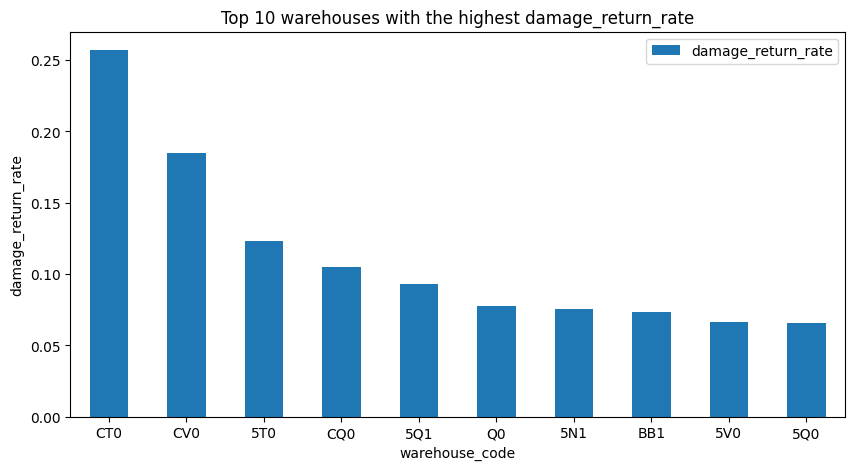

In [92]:
warehouse_analysis[:10].plot(kind='bar', x='warehouse_code', y='damage_return_rate', figsize=(10, 5))
plt.title("Top 10 warehouses with the highest damage_return_rate")
plt.ylabel("damage_return_rate")
plt.xticks(rotation=0);

In [93]:
warehouse_analysis.head()

,warehouse_code,damage_return_count,total_count,damage_return_rate
28,CT0,27.0,105,0.257143
29,CV0,1281.0,6938,0.184635
18,5T0,460.0,3744,0.122863
25,CQ0,1208.0,11510,0.104952
15,5Q1,718.0,7746,0.092693


### Categorise business area analysis

In [94]:
# Define a function to categorize business area code
def categorize_business_area(business_area_code):
    general_lighting = ['LMP', 'DLT', 'TRO', 'PEN']
    emergency_control_lighting = ['SAE', 'LCP', '960']
    specialty_lighting = ['EXL', 'TAL']
    commercial = ['950']
    industrial = ['910']
    architectural = ['945', '940', 'IAE', 'IAI']
    outdoor_urban = ['RWY', 'URB', '920', '930']
    components = ['COM']
    surface_flood = ['SUR', 'FLD', '920']
    other = ['OTH', '999']

    if business_area_code in general_lighting:
        return 'General Lighting'
    elif business_area_code in emergency_control_lighting:
        return 'Emergency and Control Lighting'
    elif business_area_code in specialty_lighting:
        return 'Specialty Lighting'
    elif business_area_code in commercial:
        return 'Commercial'
    elif business_area_code in industrial:
        return 'Industrial'
    elif business_area_code in architectural:
        return 'Architectural'
    elif business_area_code in outdoor_urban:
        return 'Outdoor and Urban'
    elif business_area_code in components:
        return 'Components'
    elif business_area_code in surface_flood:
        return 'Surface and Flood'
    elif business_area_code in other:
        return 'Other'
    else:
        return 'Uncategorized'

# Apply the function to create a new column in the DataFrame
test['business_area_category'] = test['business_area_code'].apply(categorize_business_area)

# Display the updated DataFrame
print(test[['business_area_code', 'business_area_category']].head())

  business_area_code business_area_category
0                LMP       General Lighting
1                LMP       General Lighting
2                LMP       General Lighting
3                LMP       General Lighting
4                LMP       General Lighting


<Axes: xlabel='Profit_margin', ylabel='Count'>

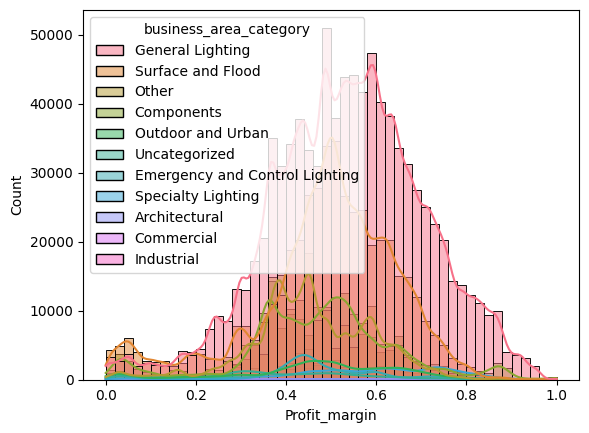

In [95]:
# select data business_area_category = commercial or industrial
commercial_industrial = test[test['business_area_category'].isin(['Commercial', 'Industrial'])]
sns.histplot(data=test, x='Profit_margin', bins=50, kde=True,log_scale=False, hue='business_area_category')

<Axes: xlabel='value_sales', ylabel='Count'>

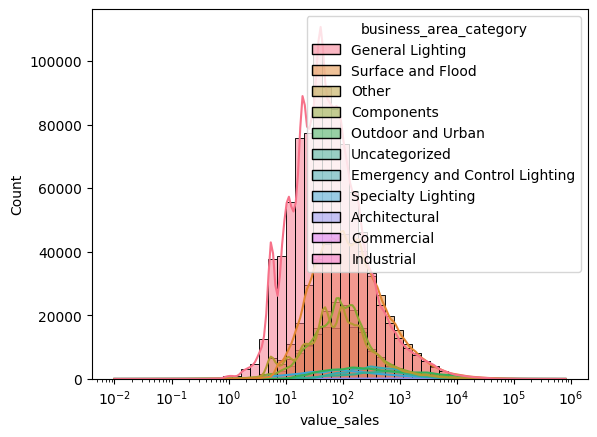

In [96]:
sns.histplot(data=test, x='value_sales', bins=50, kde=True,log_scale=True, hue='business_area_category')

<Axes: xlabel='Profit_margin', ylabel='Count'>

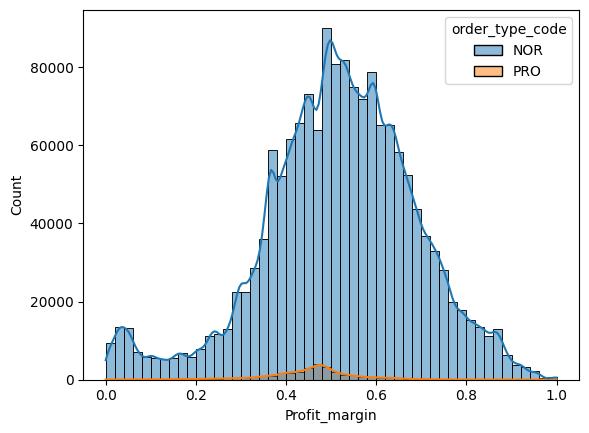

In [97]:
#select normal or project order_type_code
normal_project = test[test['order_type_code'].isin(['NOR', 'PRO'])]
sns.histplot(data=normal_project, x='Profit_margin', bins=50, kde=True,log_scale=False, hue='order_type_code')

# Categorise region

In [98]:
#categorise customer_district_code

def categorize_district_code(district_code):
    aus = ['410','300','500','310','400','200','210','720','710','600','510']
    nz = ['530', '535', '540','520','545']
    if district_code in aus:
        return 'Australia'
    elif district_code in nz:
        return 'New Zealand'
    else:
        return 'Other'

# Apply the function to create a new column in the DataFrame
test['district_category'] = test['customer_district_code'].apply(categorize_district_code)

# Display the updated DataFrame
print(test[['customer_district_code', 'district_category']].head())

  customer_district_code district_category
0                    410         Australia
1                    300         Australia
2                    300         Australia
3                    500         Australia
4                    500         Australia


<Axes: xlabel='Profit', ylabel='Count'>

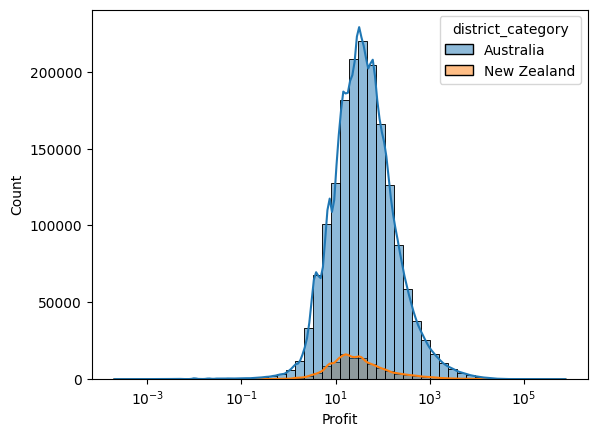

In [99]:
sns.histplot(data=test, x='Profit', bins=50, kde=True,log_scale=True, hue='district_category')

## 8. Document Findings
- Note interesting observations, such as trends, anomalies, or patterns.
- Save key plots or summary tables that highlight important findings.

### Section 2: Exploratory Insight

#### 1. Warehouses with the highest damage return rate

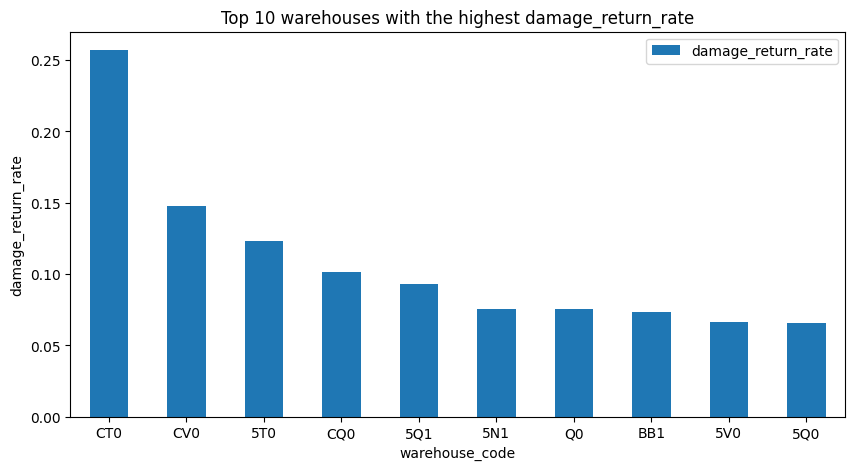

The bar chart you've provided shows the damage_return_rate for the top 10 warehouses, and here's how we can interpret the results to help guide the business:

**Interpretation of the Chart**
1. Warehouse CT0 (Crompton - Tasmania) Has the Highest Damage/Return Rate:

- The damage_return_rate for warehouse CT0 (Crompton - Tasmania) is significantly higher compared to other warehouses, indicating potential problems in handling, storage, or the processes at this particular warehouse.
2. Warehouses with High Damage/Return Rates:

- After CT0 (Crompton - Tasmania), warehouses like CV0 (Crompton - Melbourne) and 5T0 (Gerard Trade - Tasmania) also have comparatively high return rates. The rates then decrease for subsequent warehouses, with the lowest rates among the top 10 for warehouses like 5V0 (Gerard Trade - Melbourne) and 5Q0 (Gerard Trade - Brisbane).
3. Disparity in Warehouse Performance:

- There is a noticeable disparity in the damage_return_rate across different warehouses, with some warehouses performing significantly better than others.

#### 2. Damage/Return rate by item type

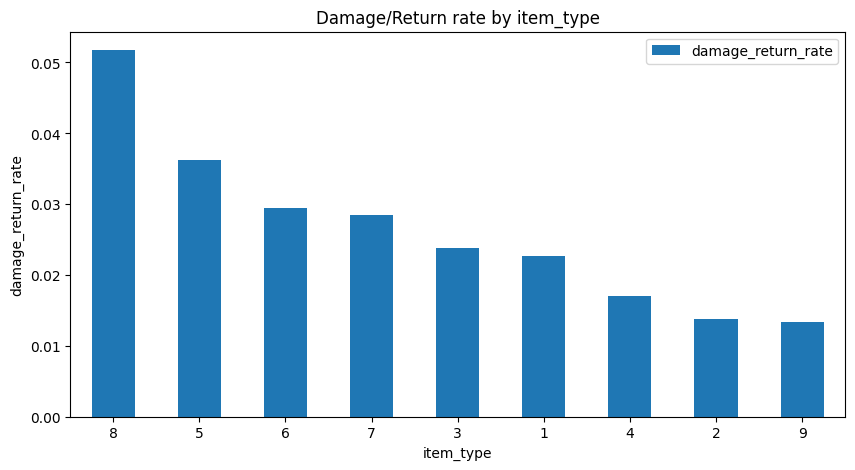

How This Analysis Helps the Business
**Quality Improvement for Specific Item Types**:

Focus on item_type 8: Since item_type 8 has a much higher return rate, it should be prioritized for quality improvement efforts. This could involve working with suppliers to improve manufacturing processes, changing materials used, or improving the overall design.
Analyze Return Reasons: Consider gathering customer feedback specifically for item_type 8. Understanding why this type has a higher return rate (e.g., quality, incorrect descriptions, or unmet expectations) will be critical for improvements.
1. Supplier and Manufacturing Adjustments:

- Supplier Negotiation: If the high damage/return rate for item_type 8 can be traced back to a specific supplier or batch, consider negotiating with suppliers to ensure better quality or switching to a more reliable supplier.
Manufacturing Review: Assess manufacturing conditions and packaging for these high-risk items. This may help reduce the damage during production, handling, or shipping.
2. Inventory Management:

- Adjust Stock Levels: Lower stock levels of item_type 8 and other high-return items, especially if the cost of returns is significantly impacting profitability. Redirect resources towards item types that perform well with low return rates, such as item_types 2, 4, and 9.
Discontinue or Redevelop: If improvements are not feasible or successful, consider discontinuing problematic item_types with persistently high return rates.
3. Targeted Customer Communication:

- Enhanced Product Descriptions: For item_type 8, ensure product descriptions, images, and features are as accurate as possible to align customer expectations with the actual product.
Proactive Support: For customers purchasing high-return-rate item types, offer additional customer support, such as size charts, product demos, or customer testimonials to reduce returns.
4. Marketing and Product Strategy:

- Highlight Low-Return Item Types: Emphasize the reliability of item types 2, 4, and 9 in marketing campaigns, as they have the lowest damage/return rates. This builds customer confidence in purchasing these products.
Product Bundling: Consider bundling low-return-rate items with high-return items to increase sales while mitigating the negative impact of potential returns.

#### 3. Top 10 items with highest damage_return_rate

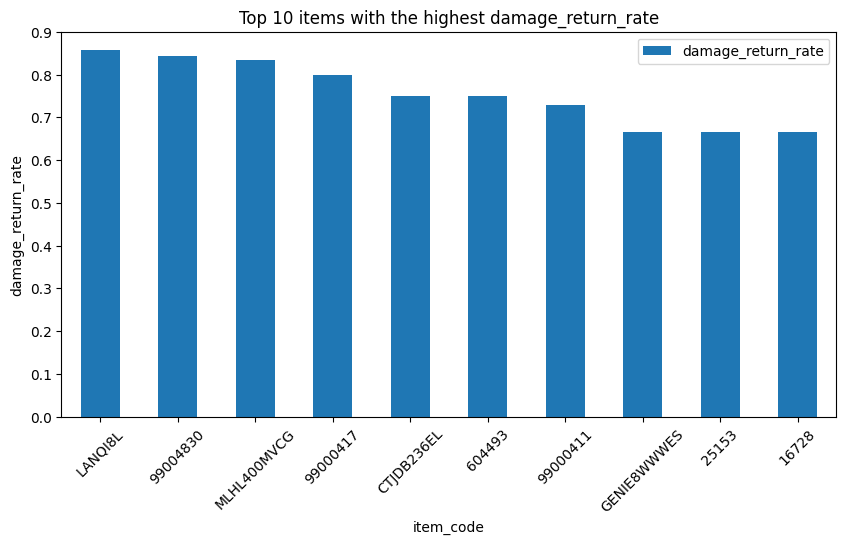

The analysis of identifying which item_code is more likely to be damaged or returned can significantly help the business in several ways:

1. Quality Control and Product Improvement
- Identifying Problematic Items: By analyzing which item_code has the highest return or damage rate, the business can focus on identifying the root causes. This may indicate quality issues, poor packaging, or manufacturing defects. Once identified, targeted improvements can be made to enhance product quality, resulting in fewer returns and increased customer satisfaction.
- Supplier Assessment: If multiple items from a specific supplier are consistently being returned, this analysis can be used to communicate with the supplier regarding quality concerns or to reconsider the partnership.
2. Cost Reduction
- Reducing Costs from Returns: Returned and damaged goods add significant costs due to logistics, inspection, repackaging, and potential loss of value. Understanding which items are most problematic allows the business to take action (like improving product quality or packaging) to reduce these costs.
- Optimizing Logistics: If damages are often related to logistics (e.g., mishandling during transportation), this data could guide the improvement of packaging, shipping methods, or selection of delivery partners. This leads to reduced costs associated with replacements and returns.
3. Inventory and Stock Management
- Adjusting Inventory Levels: Items that have high return rates might not sell as expected or may be less profitable due to frequent returns. The business could adjust inventory levels accordingly, reducing overstocking of potentially problematic items.
- Removing Low-Quality Items: For items with consistently high return rates, it may be more beneficial to discontinue them, freeing up inventory space for higher-quality products that have lower return rates and higher customer satisfaction.
4. Customer Satisfaction and Brand Loyalty
- Improving Customer Experience: Frequent returns or damaged goods negatively impact customer experience, which can lead to a loss of trust and loyalty. By taking proactive measures to minimize damages and returns, the business can increase overall customer satisfaction, leading to higher retention and better word-of-mouth recommendations.
- Targeted Feedback and Customer Insights: Understanding which items are returned the most can lead to surveys or targeted customer feedback to understand specific reasons for returns. These insights are valuable for developing better products that align more closely with customer needs.
5. Product and Market Strategy
- Adjusting Product Offerings: High return rates might indicate a mismatch between product features and customer expectations. This analysis can help adjust product features, redesign products, or re-target marketing strategies.
Marketing and Pricing Decisions: If an item has a high return rate, the business may rethink its promotional strategy for that item. Perhaps it needs more accurate product descriptions, lower pricing, or be targeted to a different audience.
6. Risk Mitigation
- Identifying Risks in Product Line: High rates of returns or damages can point to inherent risks within a product line, such as susceptibility to defects or customer dissatisfaction. This information is essential for risk management planning, ensuring that problematic items do not lead to significant business losses.
7. Employee Training and Warehouse Operations
- Better Handling Practices: If the damage rate points to warehousing or handling problems, the business can implement better training for employees, change packaging materials, or refine handling procedures to reduce damage rates.
Warehouse Layout Optimization: Items more likely to be returned or damaged can provide clues about warehouse conditions. For instance, fragile items might need to be stored in specific areas or require more space to minimize accidents.

**Overall Value to Business**

The overall benefit is that the analysis provides actionable insights into which products require improvement, reducing costs related to damages and returns, enhancing customer satisfaction, and improving overall product quality. This, in turn, can increase profitability and create a stronger, more reliable brand image in the market.

Would you like more detailed recommendations on how to act on these insights for your specific business context?

#### 4. Monthly Sales by light source

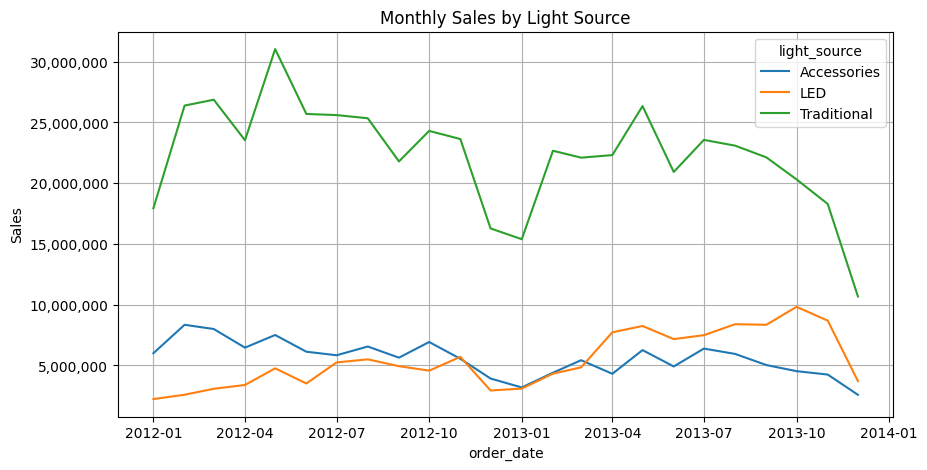

The chart represents daily sales by light source over the period from January 2012 to January 2014. Here are some insights from the visual:

1. Dominant Product Category: The "Traditional" light source has consistently higher sales compared to "Accessories" and "LED" throughout the time period, indicating its dominance in the market. This might suggest a consumer preference or a larger existing market for traditional lighting during these years.

2. Sales Volatility: The "Traditional" light source shows significant volatility, with several sharp peaks, indicating occasional high-volume sales. This could be due to specific events or seasonal promotions that led to spikes in sales.

3. Consistent Low Sales for Accessories: The "Accessories" category consistently shows lower sales compared to the other two categories. This suggests either a lower demand or a niche market.

4. Steady Growth in LED Sales: The "LED" category shows a gradual increase in sales, indicating a slow but steady adoption of LED lights over the period. This trend could reflect growing consumer awareness of energy efficiency and the advantages of LED lighting.

5. Stable Pattern: There is a repeating pattern in the "Traditional" sales, with peaks and drops that seem to follow a monthly or seasonal cycle. This suggests that the sales of "Traditional" light sources might be influenced by seasonal demand, such as during holidays or specific industry events.

6. Sales Consistency: Despite the volatility of "Traditional" lighting, both "Accessories" and "LED" sales are relatively stable without large peaks, reflecting a more consistent consumer demand in these categories.

7. To derive deeper insights, it might be helpful to investigate specific dates where peaks in "Traditional" light source sales occur, as this could indicate marketing events, discounts, or other external factors. Additionally, a breakdown of sales by year could highlight shifts in consumer behavior, such as an increase in LED adoption over time.

#### 5. Monthly Average Profit margin by Light Source

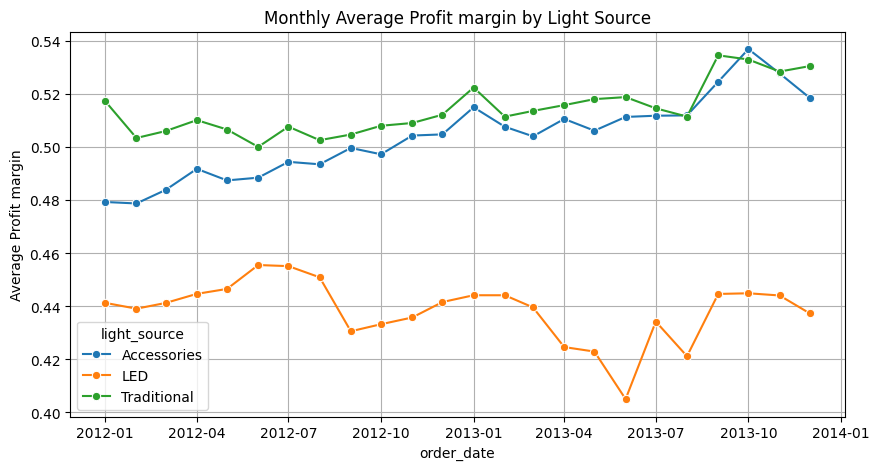

### Section 3: Test Sub Sample Differences
Develop two questions that require you to apply a two-sample test for each question and 
run these tests and derive insights from the data.

#### 1. "Is there a significant difference in the average value_sales between two different abc_class_code (Top Sellers vs Low Sellers) categories?"

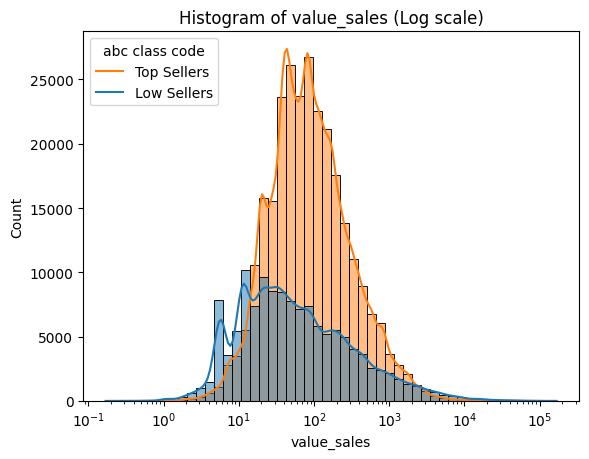

In [100]:
#select data where abc_class_code = A, or C
abc_class = test[test['abc_class_code'].isin(['A', 'C'])]
sns.histplot(data=abc_class, x='value_sales', bins=50, kde=True,log_scale=True, hue='abc_class_code')
plt.title("Histogram of value_sales (Log scale)")
plt.legend(title='abc class code', loc='upper left', labels=['Top Sellers', 'Low Sellers'])
plt.show()


"Is there a significant difference in the average value_sales between two different abc_class_code (Top Sellers vs Low Sellers) categories?"

Here’s why these results would be valuable for the management team:

1. Strategic Decision-Making
The management team can use the insights from comparing "Top Sellers" and "Low Sellers" to make strategic inventory decisions. If a significant difference in value_sales is identified, this indicates that items in the "Top Sellers" category consistently generate higher sales, justifying prioritization in terms of stocking, marketing efforts, and resources.
2. Optimized Inventory Management
Understanding the sales dynamics of "Top Sellers" vs. "Low Sellers" can guide inventory optimization. For example, if the "Top Sellers" category has significantly higher sales, management could focus on keeping those items adequately stocked, minimizing out-of-stock situations, and thereby ensuring consistent revenue.
3. Resource Allocation
If the results show a significant difference between "Top Sellers" and "Low Sellers," the management team can make data-driven decisions to allocate more budget towards marketing and advertising efforts for the high-performing products. Conversely, they may choose to reduce investments or phase out items that consistently underperform.
4. Sales Forecasting and Target Setting
Identifying significant differences in average sales helps the team improve sales forecasting accuracy. By focusing on the "Top Sellers," management can better project future revenue, set realistic sales targets, and benchmark the performance of different product categories.
5. Product Portfolio Optimization
These results also help in evaluating which products bring more value to the business. With evidence of significant differences, the management can work on optimizing the product portfolio by focusing on adding more products that have similar features or appeal to those in the "Top Sellers" category, ultimately driving sales growth.
6. Customer Insights
Insights from the analysis could also reveal important customer behavior trends. If "Top Sellers" generate significantly higher sales, it might indicate customer preferences towards certain products or features. Management can leverage this information to refine product offerings and develop targeted promotional campaigns that resonate with customer demand.
7. Risk Management
A significant difference in sales across categories can also highlight potential risks associated with over-reliance on specific product categories. If the company finds that its revenue largely depends on the "Top Sellers" category, this might prompt them to explore diversification strategies to mitigate risk and maintain business stability.
Overall, these results help management take a data-driven approach towards optimizing inventory, allocating resources, refining the product mix, and improving overall profitability—all of which are crucial to achieving business goals and staying competitive.

"Is there a significant difference in the average Profit between two different light_source (LED vs Traditional) categories?"

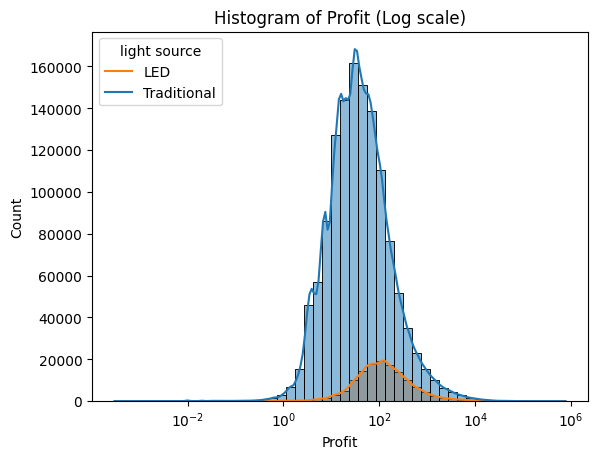

In [109]:
#select data where light_source = LED or Traditional
led_traditional = test[test['light_source'].isin(['LED', 'Traditional'])]
sns.histplot(data=led_traditional, x='Profit', bins=50, kde=True,log_scale=True, hue='light_source')
plt.title("Histogram of Profit (Log scale)")
plt.legend(title='light source', loc='upper left', labels=['LED', 'Traditional'])

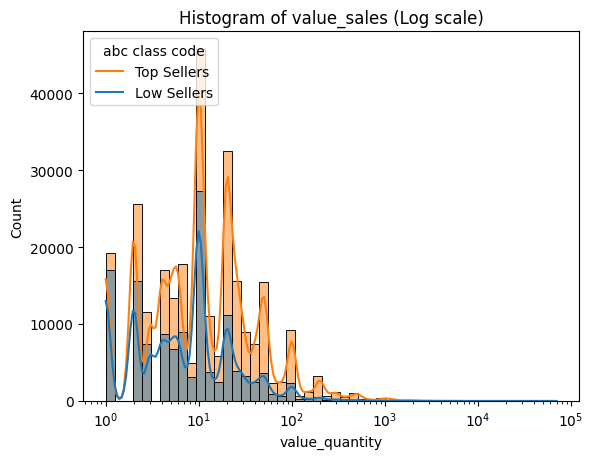

In [103]:
sns.histplot(data=abc_class, x='value_quantity', bins=50, kde=True,log_scale=True, hue='abc_class_code')
plt.title("Histogram of value_sales (Log scale)")
plt.legend(title='abc class code', loc='upper left', labels=['Top Sellers', 'Low Sellers'])
plt.show()

<Axes: xlabel='value_quantity', ylabel='Count'>

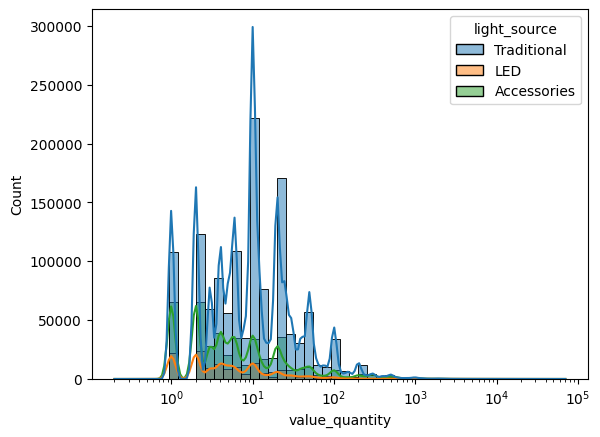

In [106]:
quantity = test[test['value_quantity'] > 0]
square_root = np.sqrt(quantity['value_quantity'])
sns.histplot(data=quantity, x='value_quantity', bins=50, kde=True,log_scale=True, hue='light_source')


<Axes: xlabel='value_quantity', ylabel='Count'>

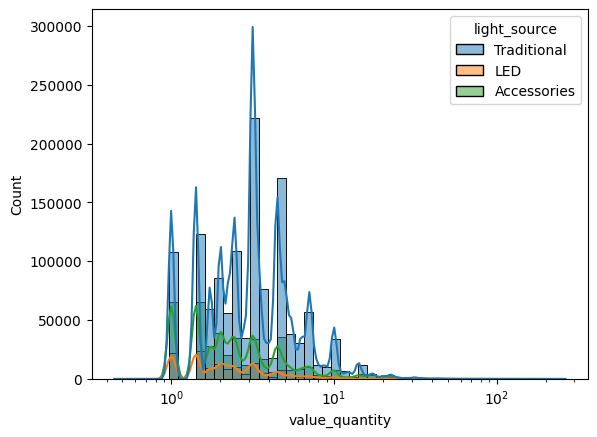

In [108]:
sns.histplot(data=quantity, x=square_root, bins=50, kde=True,log_scale=True, hue='light_source')